#**EXCHANGE RATE FORCASTING USING DEEP LEARNING MODELS**

#Preprocessing Data



In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def download_data(symbol):
    df = yf.download(symbol, start='2014-01-01',
                    end=datetime.date.today(), progress=False)
    df = df.drop('Adj Close', axis=1)
    df = df.dropna()
    return df

# Download csv
eur_usd_df = download_data('EURUSD=X')
gbp_usd_df = download_data('GBPUSD=X')
usd_cad_df = download_data('CAD=X')

In [2]:
def df_to_X_y(df):
  df_as_np = df.to_numpy()
  X = []
  y = []
  date = []
  for i in range(len(df_as_np) - 1):
    columns_to_get = ['Open', 'High', 'Low', 'Close', 'Volume']
    row = df.loc[df.index[i], columns_to_get]
    X.append(row)
    y.append(df['Close'][i + 1])
    date.append(df.index[i + 1])
  return np.array(X), np.array(y), np.array(date)

In [3]:
# Split data into X and y
eur_usd_X, eur_usd_y, eur_usd_date = df_to_X_y(eur_usd_df)
gbp_usd_X, gbp_usd_y, gbp_usd_date = df_to_X_y(gbp_usd_df)
usd_cad_X, usd_cad_y, usd_cad_date = df_to_X_y(usd_cad_df)

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Normalize X dataset
scaler = MinMaxScaler()
eur_usd_X_scaled = scaler.fit_transform(eur_usd_X)
gbp_usd_X_scaled = scaler.fit_transform(gbp_usd_X)
usd_cad_X_scaled = scaler.fit_transform(usd_cad_X)

In [5]:
eur_usd_q80 = int(len(eur_usd_X_scaled) * .8)
gbp_usd_q80 = int(len(gbp_usd_X_scaled) * .8)
usd_cad_q80 = int(len(usd_cad_X_scaled) * .8)

# Split dataset into train and test
eur_usd_X_train = eur_usd_X_scaled[:eur_usd_q80]
eur_usd_y_train = eur_usd_y[:eur_usd_q80]
eur_usd_X_test = eur_usd_X_scaled[eur_usd_q80:]
eur_usd_y_test = eur_usd_y[eur_usd_q80:]
eur_usd_date_train = eur_usd_date[:eur_usd_q80]
eur_usd_date_test = eur_usd_date[eur_usd_q80:]

gbp_usd_X_train = gbp_usd_X_scaled[:gbp_usd_q80]
gbp_usd_y_train = gbp_usd_y[:gbp_usd_q80]
gbp_usd_X_test  = gbp_usd_X_scaled[gbp_usd_q80:]
gbp_usd_y_test = gbp_usd_y[gbp_usd_q80:]
gbp_usd_date_train = eur_usd_date[:gbp_usd_q80]
gbp_usd_date_test = eur_usd_date[gbp_usd_q80:]

usd_cad_X_train = usd_cad_X_scaled[:usd_cad_q80]
usd_cad_y_train = usd_cad_y[:usd_cad_q80]
usd_cad_X_test = usd_cad_X_scaled[usd_cad_q80:]
usd_cad_y_test = usd_cad_y[usd_cad_q80:]
usd_cad_date_train = usd_cad_date[:usd_cad_q80]
usd_cad_date_test = usd_cad_date[usd_cad_q80:]

#Recurrent Neural Network Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import regularizers

rnn = Sequential()

rnn.add(SimpleRNN(50, activation='relu',
                  input_shape=(eur_usd_X_train.shape[1], 1),))

rnn.add(Dense(1))

rnn.compile(optimizer='adam', loss='mse')

rnn.fit(eur_usd_X_train, eur_usd_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 3s 9ms/step - loss: 0.3045 - val_loss: 0.0065
Epoch 2/10
53/53 [==============================] - 0s 7ms/step - loss: 0.0416 - val_loss: 0.0038
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0217 - val_loss: 0.0013
Epoch 4/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 2.8048e-04
Epoch 5/10
53/53 [==============================] - 0s 4ms/step - loss: 7.2572e-04 - val_loss: 1.5147e-05
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 3.2175e-05 - val_loss: 1.4212e-05
Epoch 7/10
53/53 [==============================] - 0s 4ms/step - loss: 2.6830e-05 - val_loss: 1.1964e-05
Epoch 8/10
53/53 [==============================] - 0s 5ms/step - loss: 2.5332e-05 - val_loss: 1.4291e-05
Epoch 9/10
53/53 [==============================] - 0s 5ms/step - loss: 2.4912e-05 - val_loss: 1.4177e-05
Epoch 10/10
53/53 [==============================] - 0s 7ms/step - loss: 2

67/67 [==============================] - 0s 2ms/step


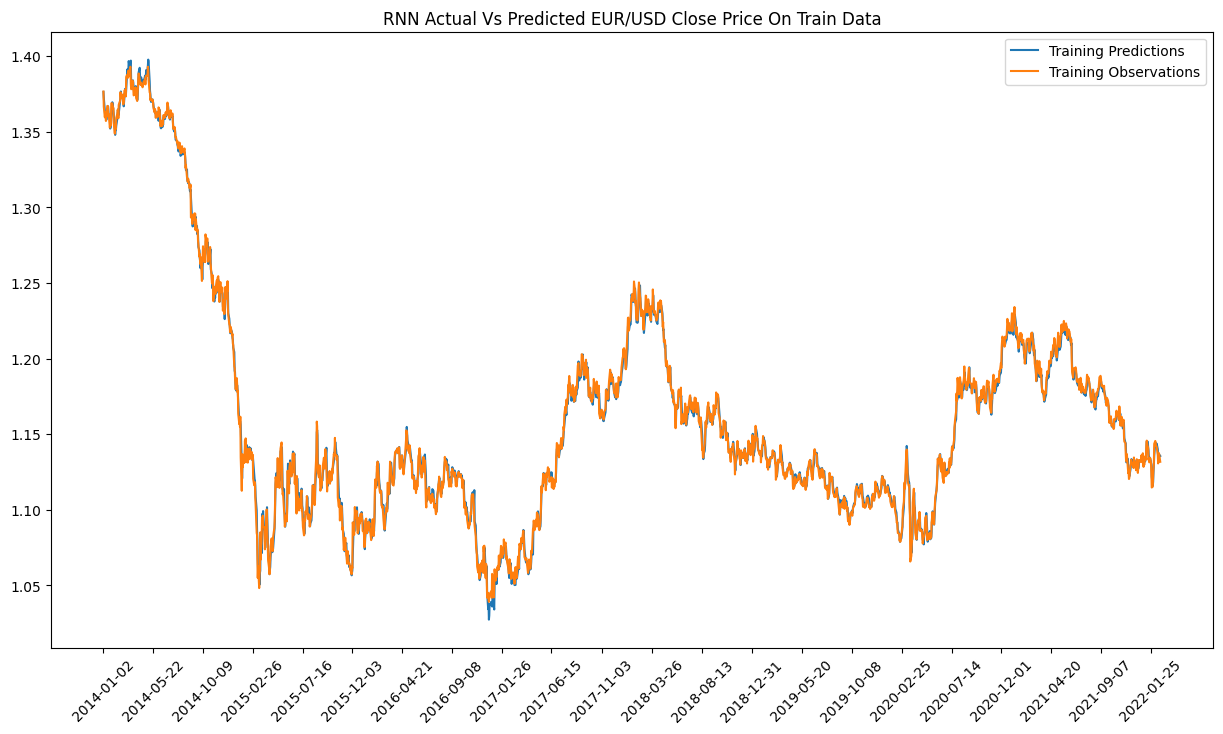

In [7]:
eur_usd_rnn_train_predictions = rnn.predict(eur_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted EUR/USD Close Price On Train Data')
plt.plot(eur_usd_date_train, eur_usd_rnn_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.xticks(eur_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 3ms/step


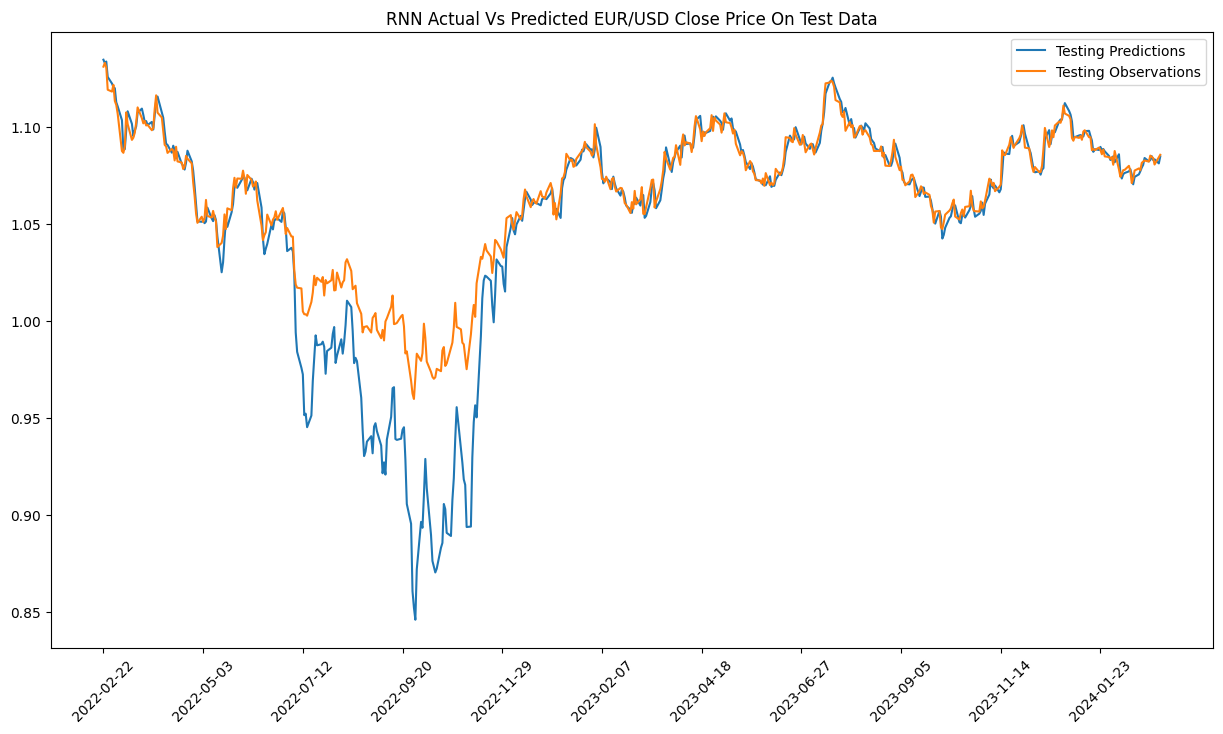

In [8]:
eur_usd_rnn_test_predictions = rnn.predict(eur_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted EUR/USD Close Price On Test Data')
plt.plot(eur_usd_date_test, eur_usd_rnn_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

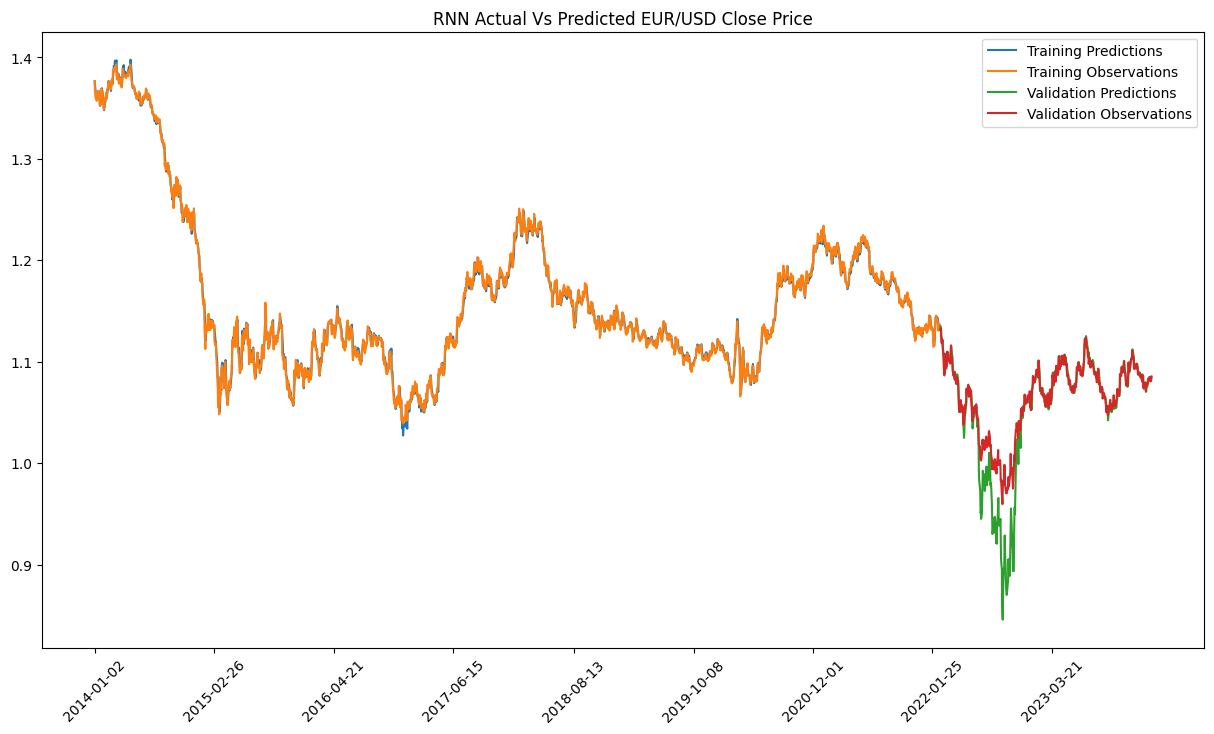

In [9]:
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted EUR/USD Close Price')
plt.plot(eur_usd_date_train, eur_usd_rnn_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.plot(eur_usd_date_test, eur_usd_rnn_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [10]:
rnn.fit(gbp_usd_X_train, gbp_usd_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 8.9863e-05
Epoch 2/10
53/53 [==============================] - 0s 4ms/step - loss: 1.2742e-04 - val_loss: 5.1361e-05
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 7.3690e-05 - val_loss: 3.3849e-05
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 5.7301e-05 - val_loss: 3.6213e-05
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 4.9042e-05 - val_loss: 3.0683e-05
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 4.6080e-05 - val_loss: 3.4417e-05
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 4.6751e-05 - val_loss: 2.4357e-05
Epoch 8/10
53/53 [==============================] - 0s 2ms/step - loss: 4.5025e-05 - val_loss: 2.2508e-05
Epoch 9/10
53/53 [==============================] - 0s 2ms/step - loss: 4.3365e-05 - val_loss: 2.8376e-05
Epoch 10/10
53/53 [==============================]

67/67 [==============================] - 0s 1ms/step


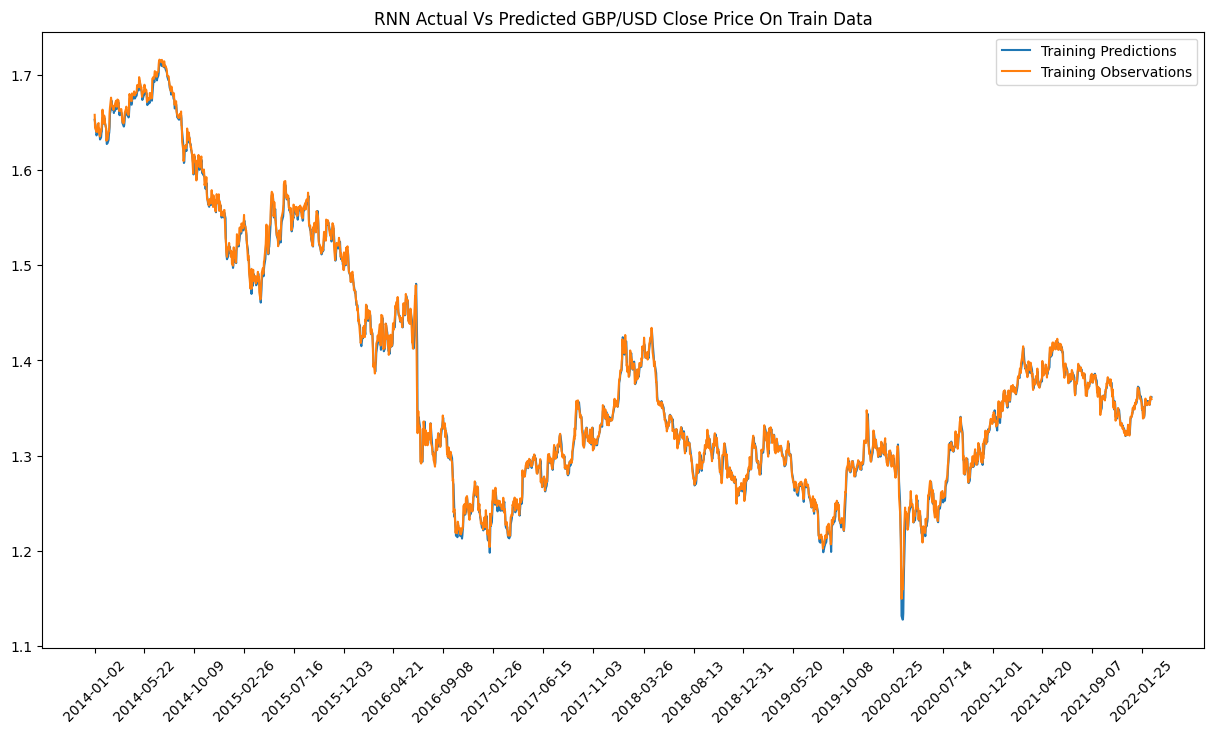

In [11]:
gbp_usd_rnn_train_predictions = rnn.predict(gbp_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted GBP/USD Close Price On Train Data')
plt.plot(gbp_usd_date_train, gbp_usd_rnn_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.xticks(gbp_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 1ms/step


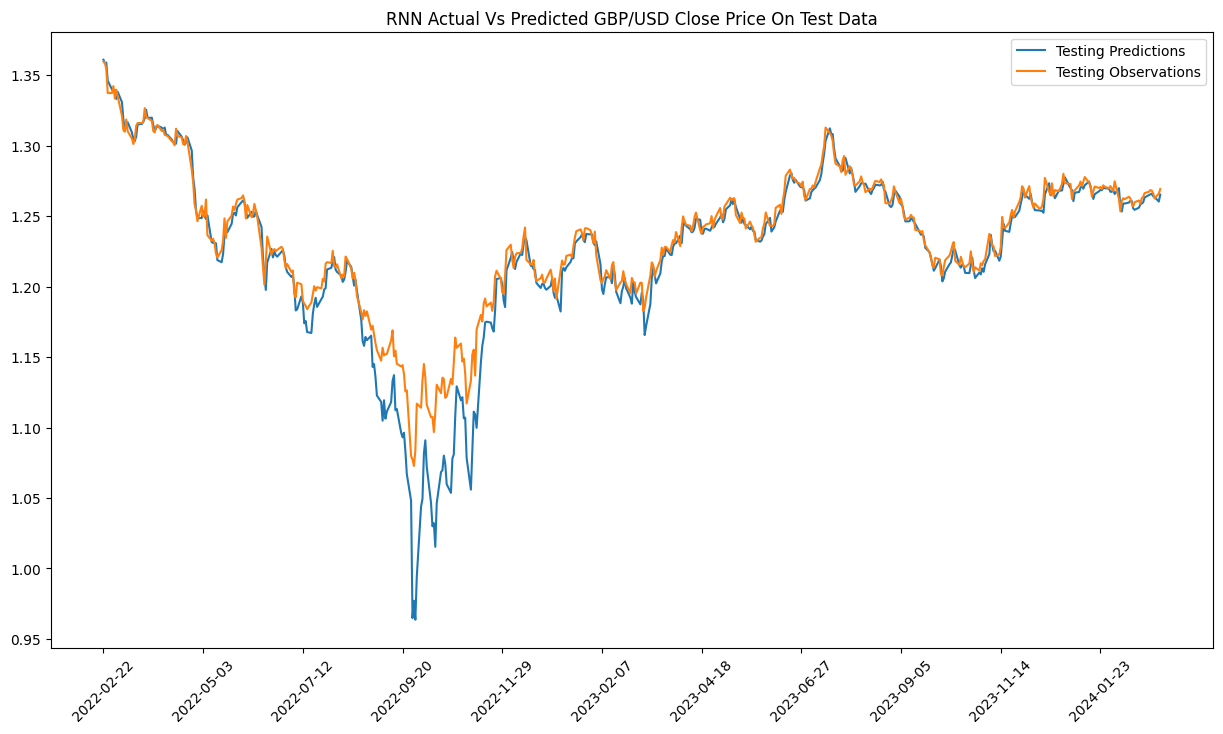

In [12]:
gbp_usd_rnn_test_predictions = rnn.predict(gbp_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted GBP/USD Close Price On Test Data')
plt.plot(gbp_usd_date_test, gbp_usd_rnn_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

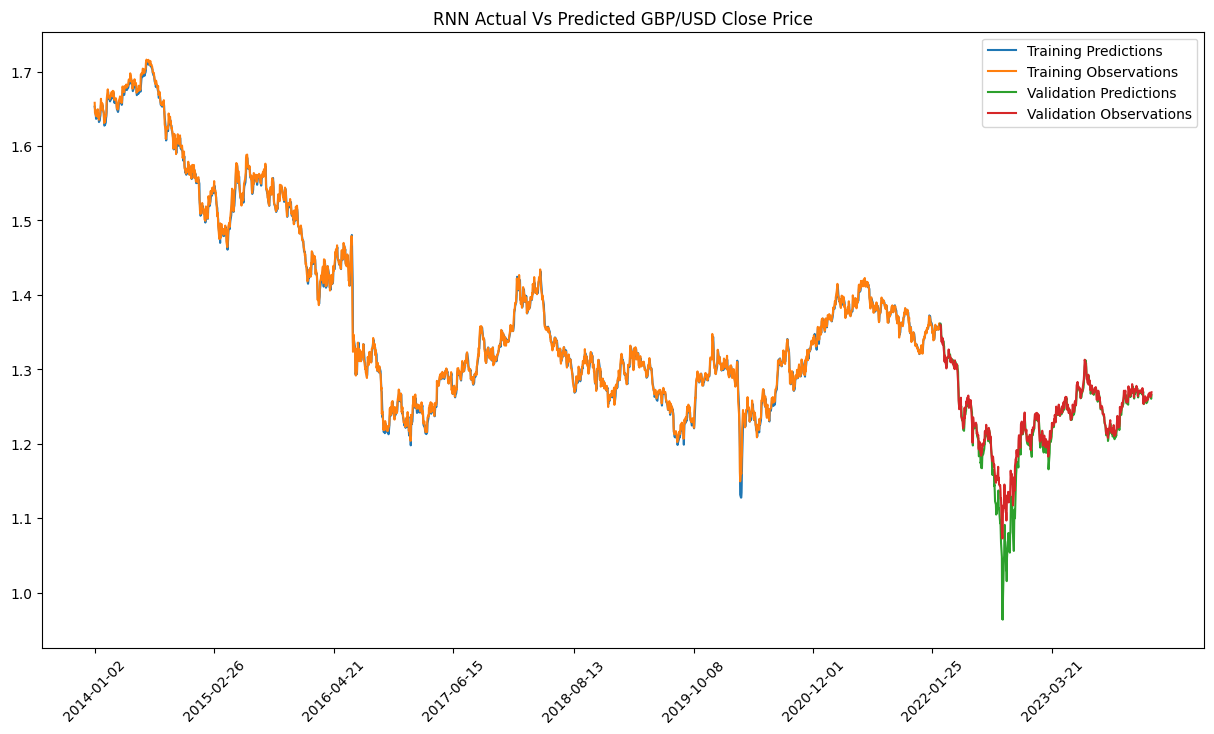

In [13]:
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted GBP/USD Close Price')
plt.plot(gbp_usd_date_train, gbp_usd_rnn_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.plot(gbp_usd_date_test, gbp_usd_rnn_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [14]:
rnn.fit(usd_cad_X_train, usd_cad_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 2.9896e-05
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 4.7220e-05 - val_loss: 2.4684e-05
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 3.5172e-05 - val_loss: 2.3183e-05
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 3.0029e-05 - val_loss: 2.5747e-05
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 2.8404e-05 - val_loss: 1.9431e-05
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 2.5216e-05 - val_loss: 1.8830e-05
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 2.5557e-05 - val_loss: 1.9847e-05
Epoch 8/10
53/53 [==============================] - 0s 2ms/step - loss: 2.4868e-05 - val_loss: 2.1071e-05
Epoch 9/10
53/53 [==============================] - 0s 2ms/step - loss: 2.3910e-05 - val_loss: 1.9924e-05
Epoch 10/10
53/53 [==============================]

67/67 [==============================] - 0s 1ms/step


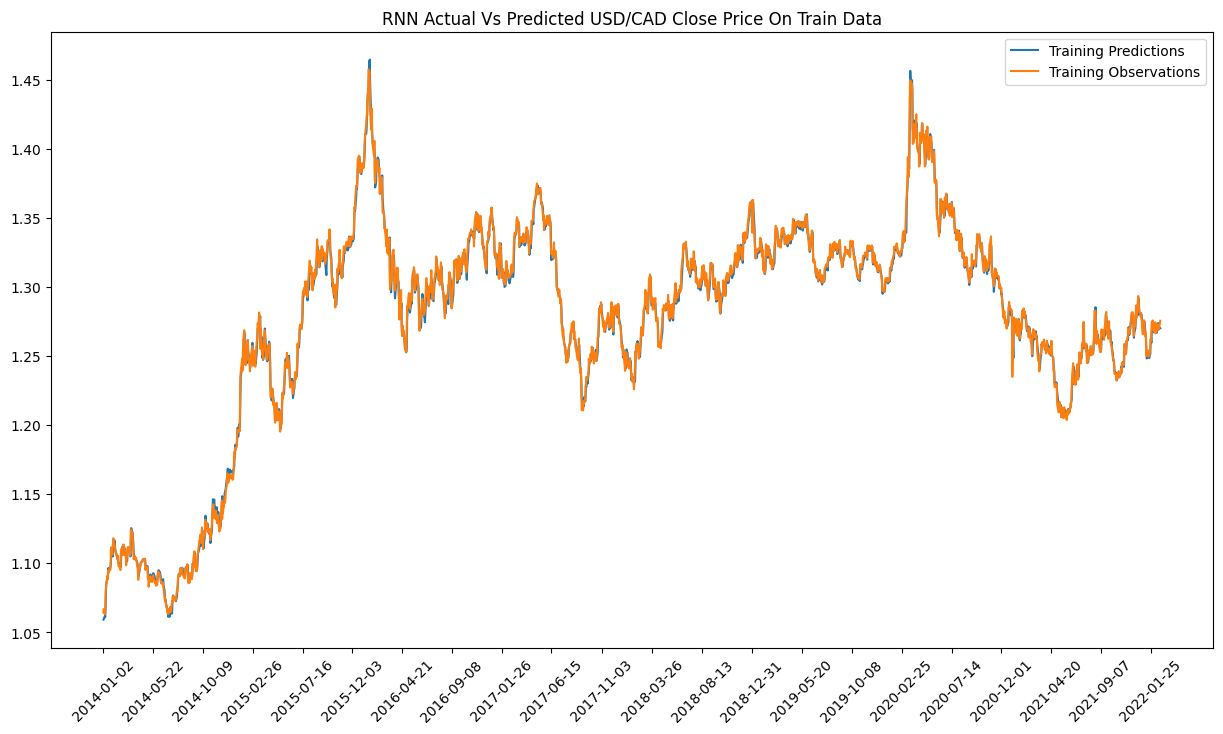

In [15]:
usd_cad_rnn_train_predictions = rnn.predict(usd_cad_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted USD/CAD Close Price On Train Data')
plt.plot(usd_cad_date_train, usd_cad_rnn_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.xticks(usd_cad_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 1ms/step


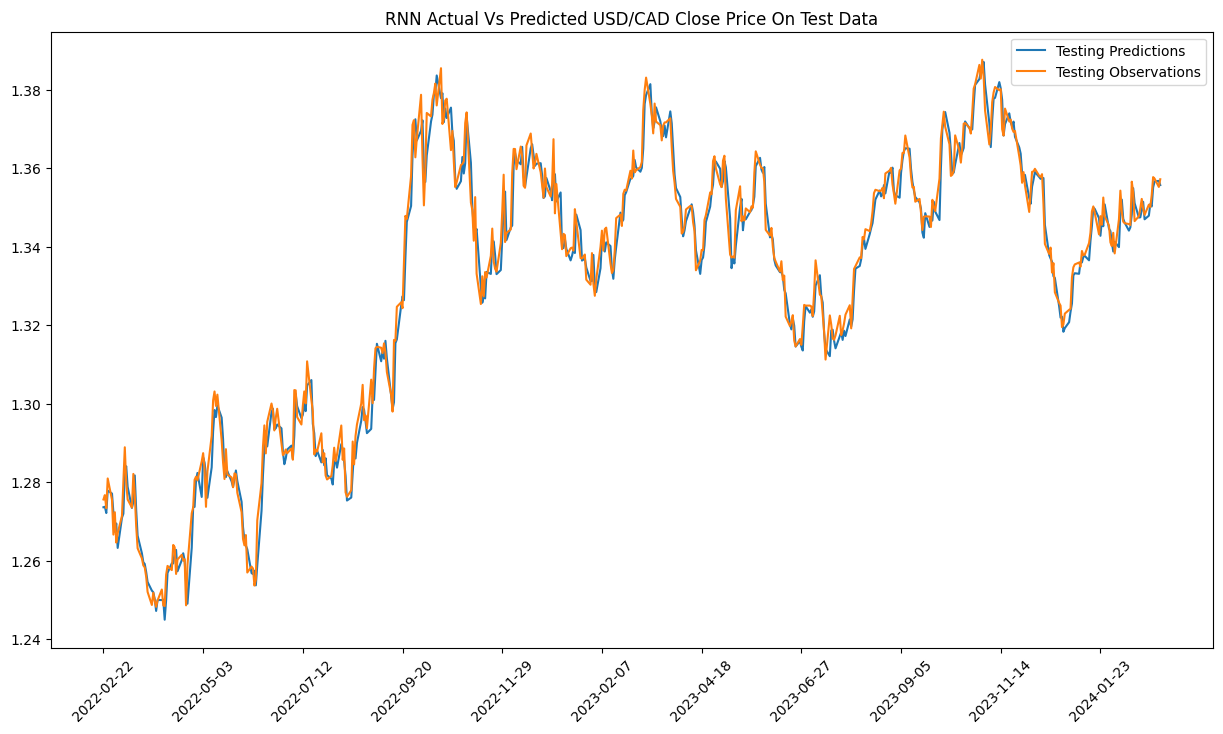

In [16]:
usd_cad_rnn_test_predictions = rnn.predict(usd_cad_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted USD/CAD Close Price On Test Data')
plt.plot(usd_cad_date_test, usd_cad_rnn_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

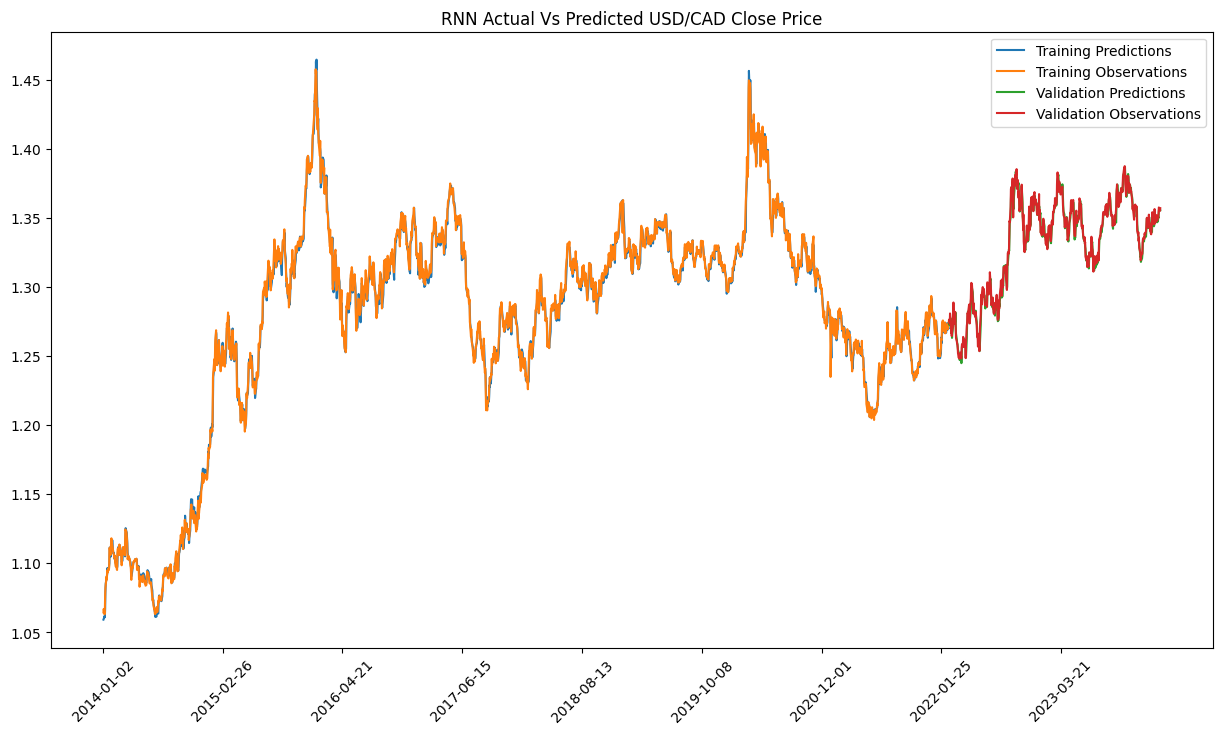

In [17]:
plt.figure(figsize=(15, 8))
plt.title('RNN Actual Vs Predicted USD/CAD Close Price')
plt.plot(usd_cad_date_train, usd_cad_rnn_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.plot(usd_cad_date_test, usd_cad_rnn_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

#Long Short-Term Memory Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

lstm = Sequential([layers.Input((5, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

lstm.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001, clipvalue=1.0),
              metrics=['mean_absolute_error'])

lstm.fit(eur_usd_X_train, eur_usd_y_train, epochs=10)

Epoch 1/10
67/67 [==============================] - 2s 3ms/step - loss: 0.4250 - mean_absolute_error: 0.5013
Epoch 2/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0089 - mean_absolute_error: 0.0735
Epoch 3/10
67/67 [==============================] - 0s 3ms/step - loss: 0.0025 - mean_absolute_error: 0.0389
Epoch 4/10
67/67 [==============================] - 0s 3ms/step - loss: 2.5780e-04 - mean_absolute_error: 0.0121
Epoch 5/10
67/67 [==============================] - 0s 3ms/step - loss: 8.3789e-05 - mean_absolute_error: 0.0072
Epoch 6/10
67/67 [==============================] - 0s 4ms/step - loss: 7.3459e-05 - mean_absolute_error: 0.0068
Epoch 7/10
67/67 [==============================] - 0s 3ms/step - loss: 6.9498e-05 - mean_absolute_error: 0.0066
Epoch 8/10
67/67 [==============================] - 0s 3ms/step - loss: 6.1512e-05 - mean_absolute_error: 0.0061
Epoch 9/10
67/67 [==============================] - 0s 3ms/step - loss: 5.5860e-05 - mean_absolute_error: 0.

67/67 [==============================] - 0s 1ms/step


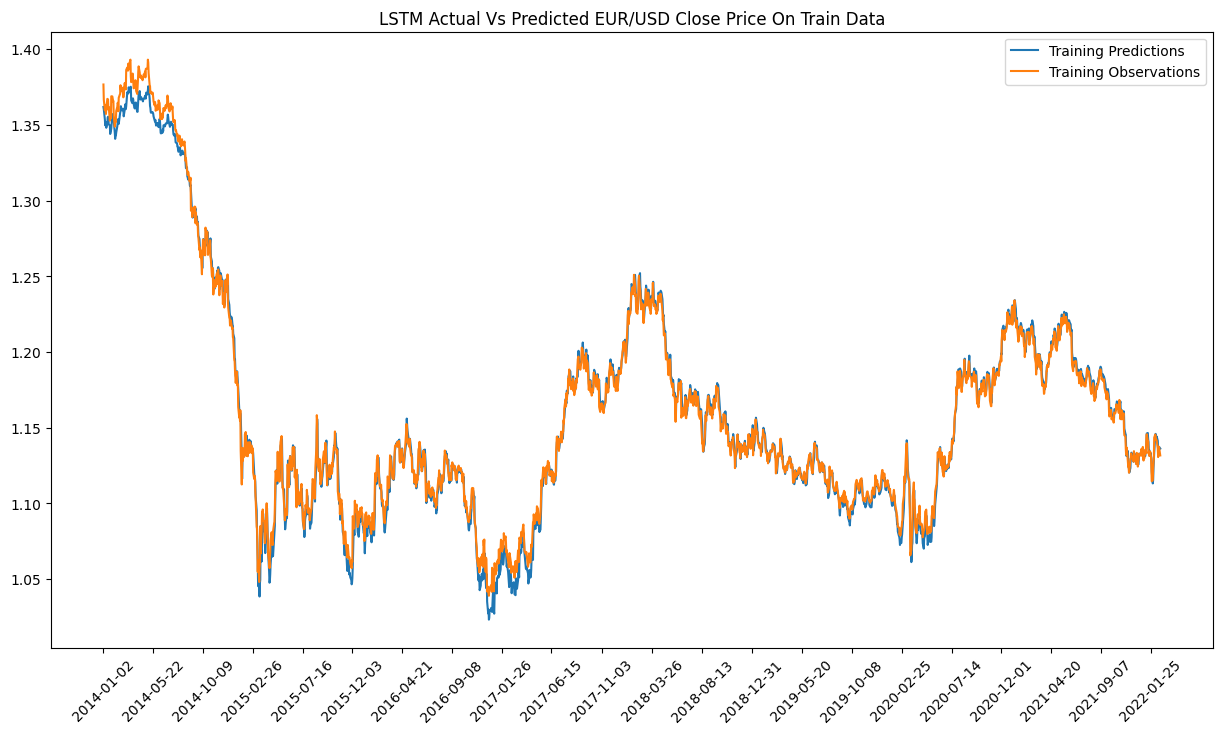

In [19]:
eur_usd_lstm_train_predictions = lstm.predict(eur_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted EUR/USD Close Price On Train Data')
plt.plot(eur_usd_date_train, eur_usd_lstm_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.xticks(eur_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 1ms/step


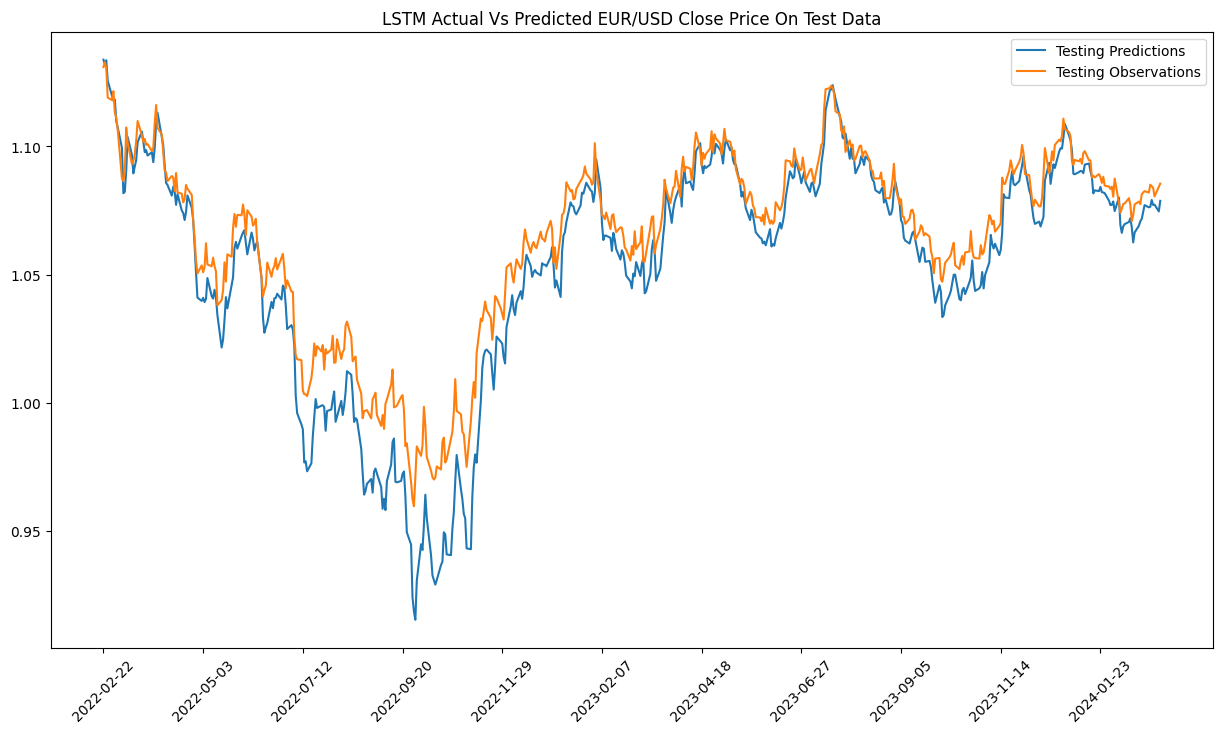

In [20]:
eur_usd_lstm_test_predictions = lstm.predict(eur_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted EUR/USD Close Price On Test Data')
plt.plot(eur_usd_date_test, eur_usd_lstm_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

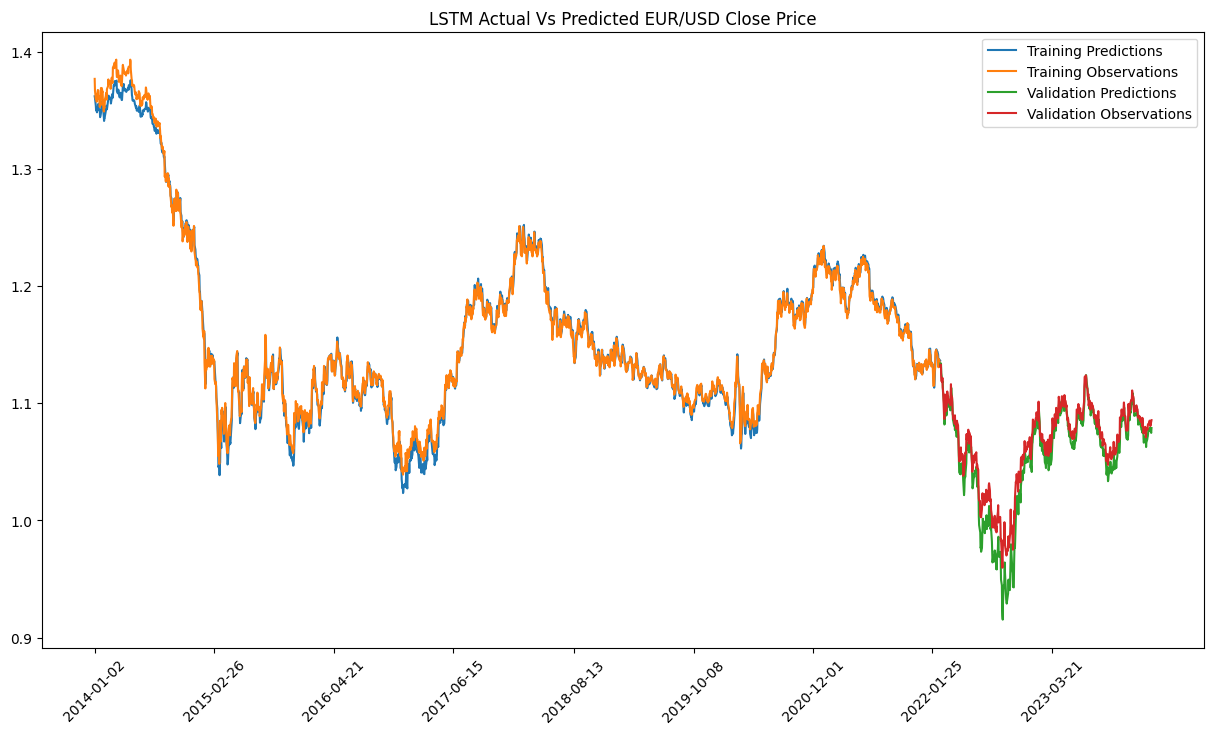

In [21]:
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted EUR/USD Close Price')
plt.plot(eur_usd_date_train, eur_usd_lstm_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.plot(eur_usd_date_test, eur_usd_lstm_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [22]:
lstm.fit(gbp_usd_X_train, gbp_usd_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 1s 21ms/step - loss: 0.0051 - mean_absolute_error: 0.0505 - val_loss: 7.2959e-05 - val_mean_absolute_error: 0.0068
Epoch 2/10
53/53 [==============================] - 0s 3ms/step - loss: 1.1657e-04 - mean_absolute_error: 0.0084 - val_loss: 6.4999e-05 - val_mean_absolute_error: 0.0067
Epoch 3/10
53/53 [==============================] - 0s 5ms/step - loss: 1.0258e-04 - mean_absolute_error: 0.0079 - val_loss: 6.6954e-05 - val_mean_absolute_error: 0.0068
Epoch 4/10
53/53 [==============================] - 0s 4ms/step - loss: 1.0511e-04 - mean_absolute_error: 0.0080 - val_loss: 1.2445e-04 - val_mean_absolute_error: 0.0098
Epoch 5/10
53/53 [==============================] - 0s 6ms/step - loss: 1.1079e-04 - mean_absolute_error: 0.0082 - val_loss: 6.1719e-05 - val_mean_absolute_error: 0.0065
Epoch 6/10
53/53 [==============================] - 0s 4ms/step - loss: 1.0472e-04 - mean_absolute_error: 0.0079 - val_loss: 5.9519e-05 - val_mean_absolu

67/67 [==============================] - 0s 1ms/step


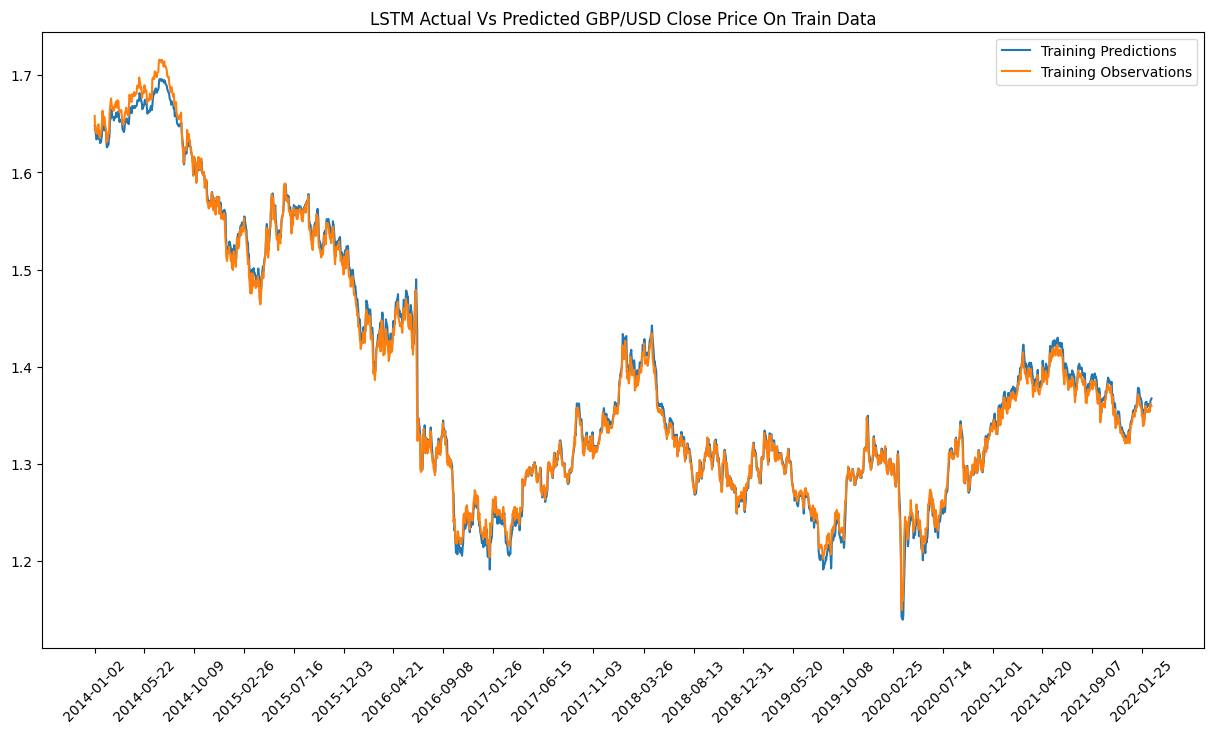

In [23]:
gbp_usd_lstm_train_predictions = lstm.predict(gbp_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted GBP/USD Close Price On Train Data')
plt.plot(gbp_usd_date_train, gbp_usd_lstm_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.xticks(gbp_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 3ms/step


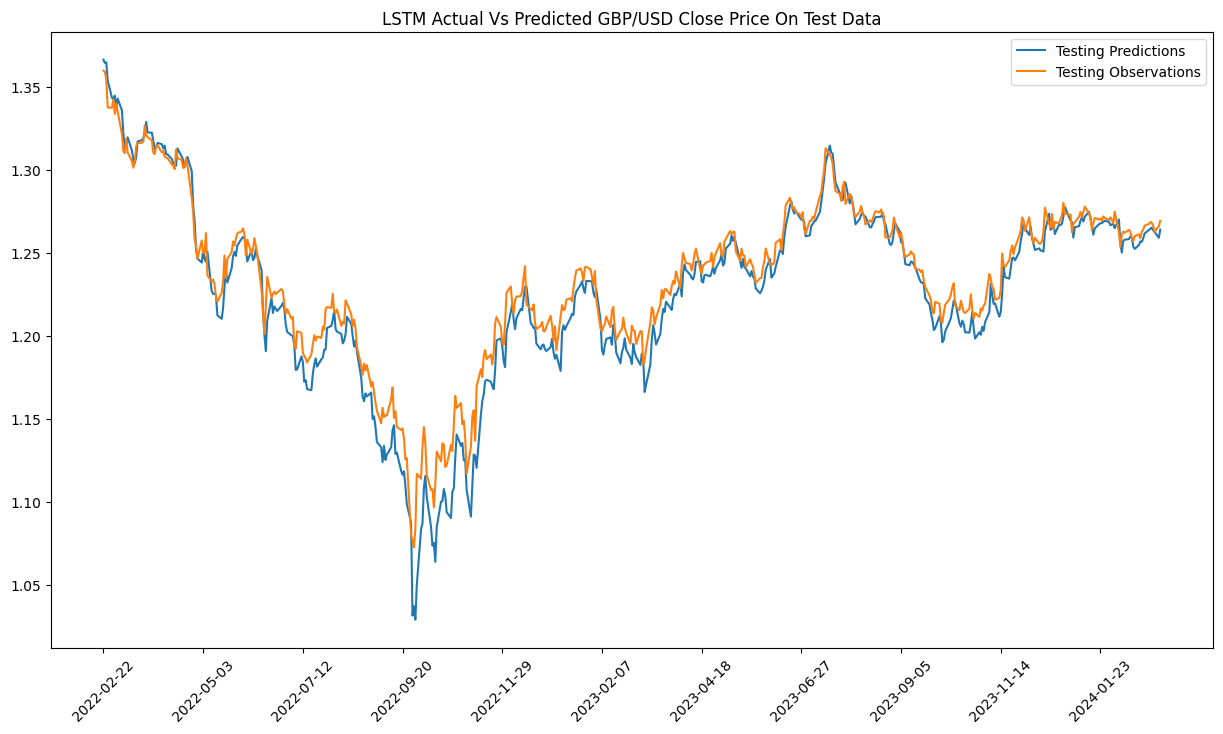

In [24]:
gbp_usd_lstm_test_predictions = lstm.predict(gbp_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted GBP/USD Close Price On Test Data')
plt.plot(gbp_usd_date_test, gbp_usd_lstm_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

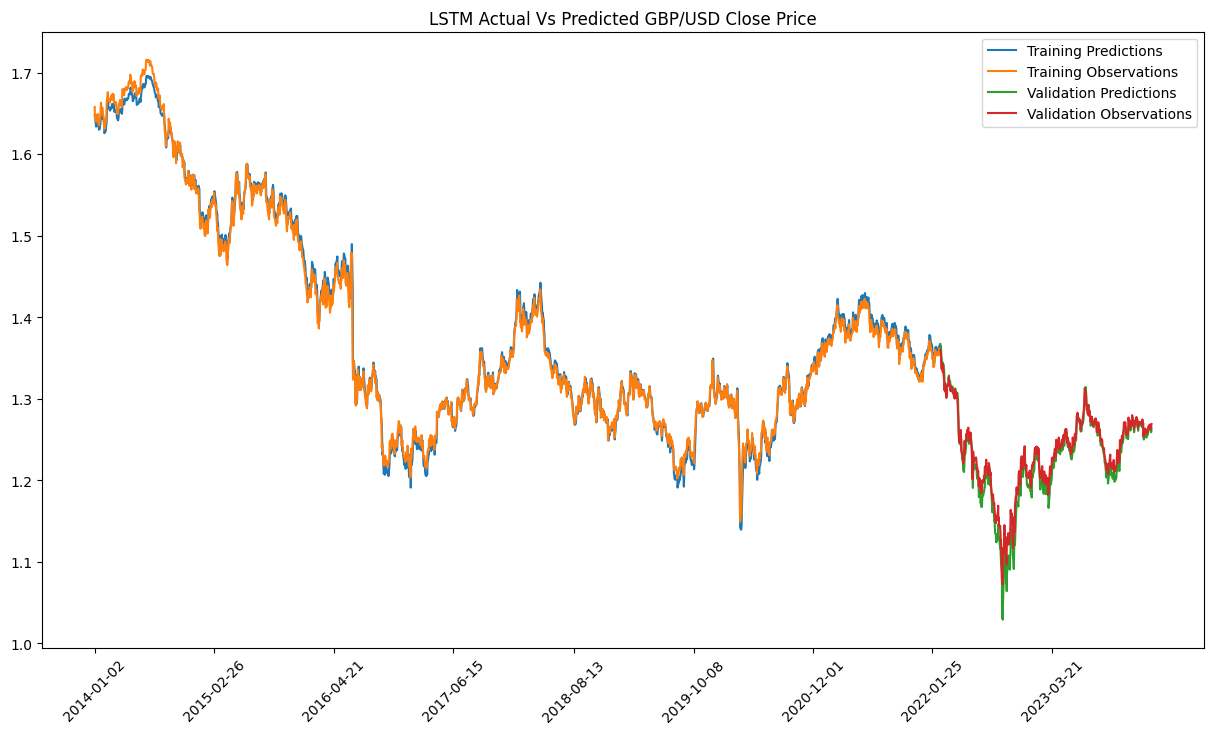

In [25]:
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted GBP/USD Close Price')
plt.plot(gbp_usd_date_train, gbp_usd_lstm_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.plot(gbp_usd_date_test, gbp_usd_lstm_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [26]:
lstm.fit(usd_cad_X_train, usd_cad_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0421 - val_loss: 9.5415e-05 - val_mean_absolute_error: 0.0086
Epoch 2/10
53/53 [==============================] - 0s 6ms/step - loss: 7.9589e-05 - mean_absolute_error: 0.0067 - val_loss: 5.5899e-05 - val_mean_absolute_error: 0.0061
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 6.7817e-05 - mean_absolute_error: 0.0062 - val_loss: 7.4462e-05 - val_mean_absolute_error: 0.0074
Epoch 4/10
53/53 [==============================] - 0s 3ms/step - loss: 6.5048e-05 - mean_absolute_error: 0.0061 - val_loss: 7.1028e-05 - val_mean_absolute_error: 0.0071
Epoch 5/10
53/53 [==============================] - 0s 3ms/step - loss: 6.3344e-05 - mean_absolute_error: 0.0060 - val_loss: 8.3535e-05 - val_mean_absolute_error: 0.0079
Epoch 6/10
53/53 [==============================] - 0s 4ms/step - loss: 6.3676e-05 - mean_absolute_error: 0.0061 - val_loss: 6.6415e-05 - val_mean_absolut

67/67 [==============================] - 0s 1ms/step


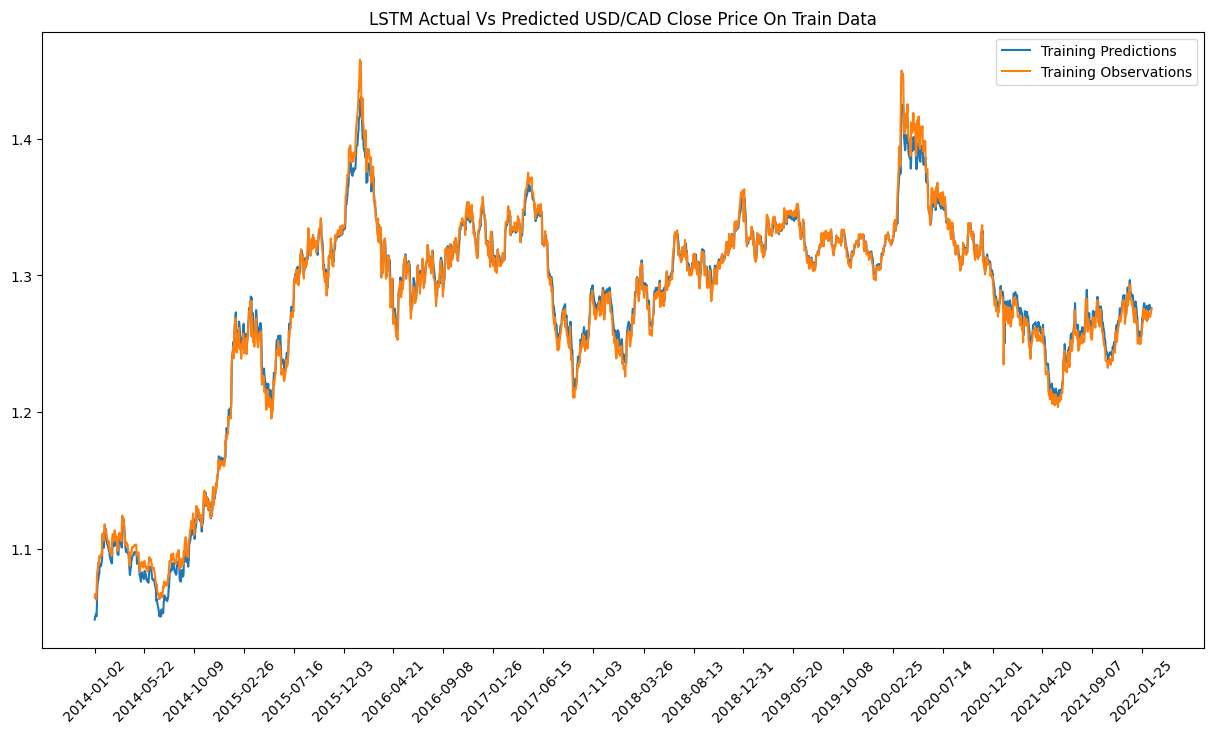

In [27]:
usd_cad_lstm_train_predictions = lstm.predict(usd_cad_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted USD/CAD Close Price On Train Data')
plt.plot(usd_cad_date_train, usd_cad_lstm_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.xticks(usd_cad_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 1ms/step


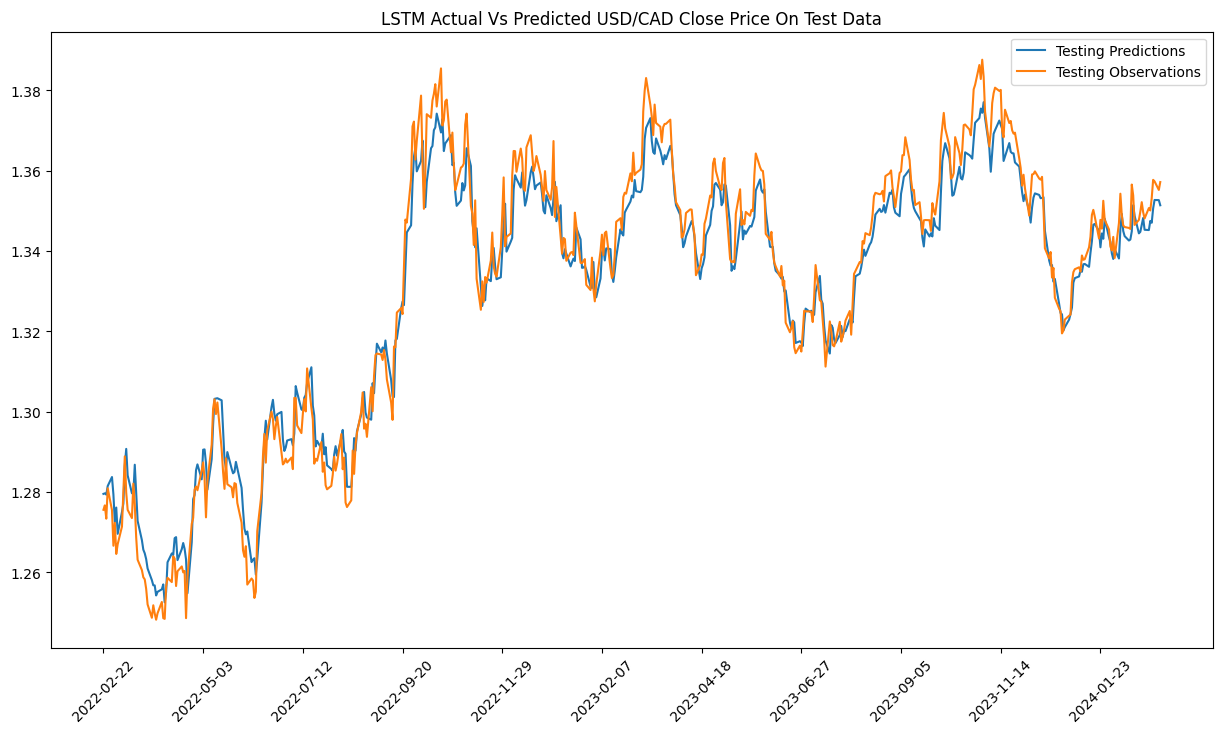

In [28]:
usd_cad_lstm_test_predictions = lstm.predict(usd_cad_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted USD/CAD Close Price On Test Data')
plt.plot(usd_cad_date_test, usd_cad_lstm_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

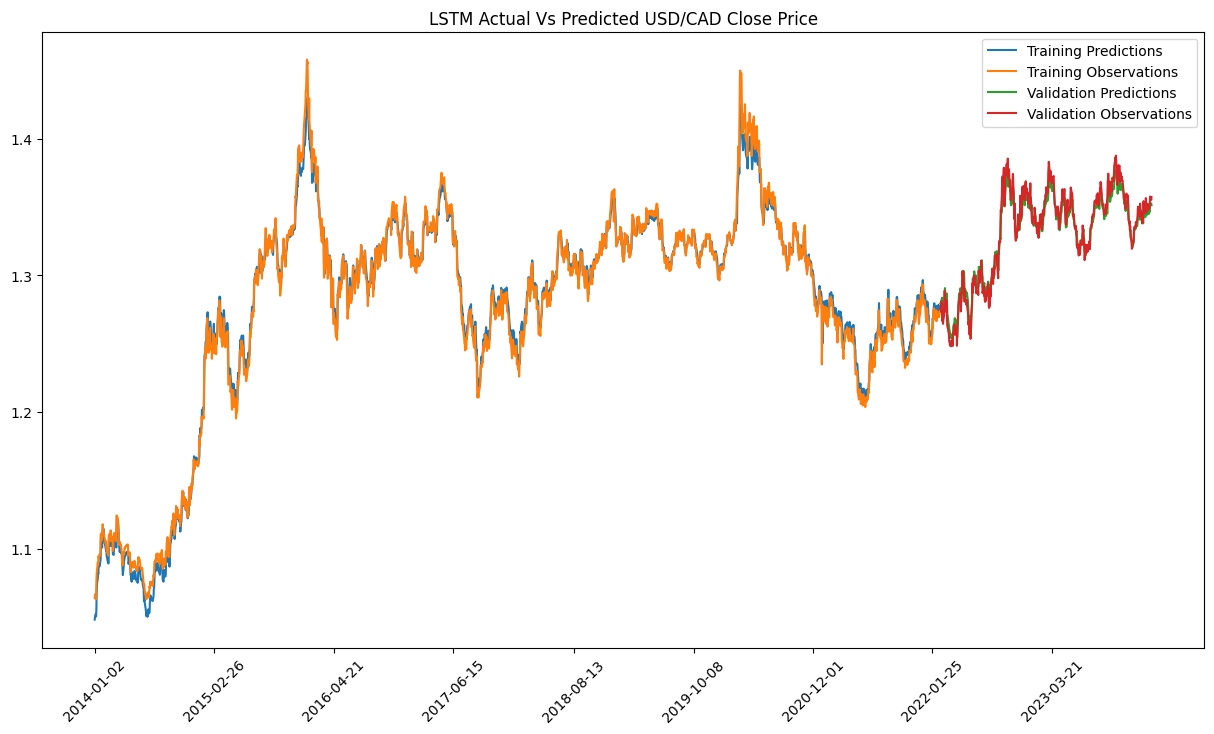

In [29]:
plt.figure(figsize=(15, 8))
plt.title('LSTM Actual Vs Predicted USD/CAD Close Price')
plt.plot(usd_cad_date_train, usd_cad_lstm_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.plot(usd_cad_date_test, usd_cad_lstm_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

#Gated Recurrent Unit Model





In [30]:
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense

gru = Sequential()

gru.add(GRU(units=100, return_sequences=True,
            input_shape=(eur_usd_X_train.shape[1],1), activation='tanh'))

gru.add(Dropout(0.3))

# Second GRU layer
gru.add(GRU(units=80, return_sequences=True,
            input_shape=(eur_usd_X_train.shape[1],1), activation='tanh'))

gru.add(Dropout(0.2))

# Third GRU layer
gru.add(GRU(units=50, return_sequences=True,
            input_shape=(eur_usd_X_train.shape[1],1), activation='tanh'))

gru.add(Dropout(0.1))

# Fourth GRU layer
gru.add(GRU(units=30, activation='tanh'))
gru.add(Dropout(0.2))

# The output layer
gru.add(Dense(units=1))

# Compiling the RNN
gru.compile(optimizer='adam',loss='mean_squared_error')

# Fitting to the training set
gru.fit(eur_usd_X_train, eur_usd_y_train, epochs=10, batch_size=150)

Epoch 1/10
15/15 [==============================] - 6s 21ms/step - loss: 0.4814
Epoch 2/10
15/15 [==============================] - 0s 23ms/step - loss: 0.0652
Epoch 3/10
15/15 [==============================] - 0s 22ms/step - loss: 0.0386
Epoch 4/10
15/15 [==============================] - 0s 23ms/step - loss: 0.0302
Epoch 5/10
15/15 [==============================] - 0s 23ms/step - loss: 0.0263
Epoch 6/10
15/15 [==============================] - 0s 23ms/step - loss: 0.0240
Epoch 7/10
15/15 [==============================] - 0s 22ms/step - loss: 0.0217
Epoch 8/10
15/15 [==============================] - 0s 23ms/step - loss: 0.0188
Epoch 9/10
15/15 [==============================] - 0s 21ms/step - loss: 0.0180
Epoch 10/10
15/15 [==============================] - 0s 20ms/step - loss: 0.0177


67/67 [==============================] - 1s 4ms/step


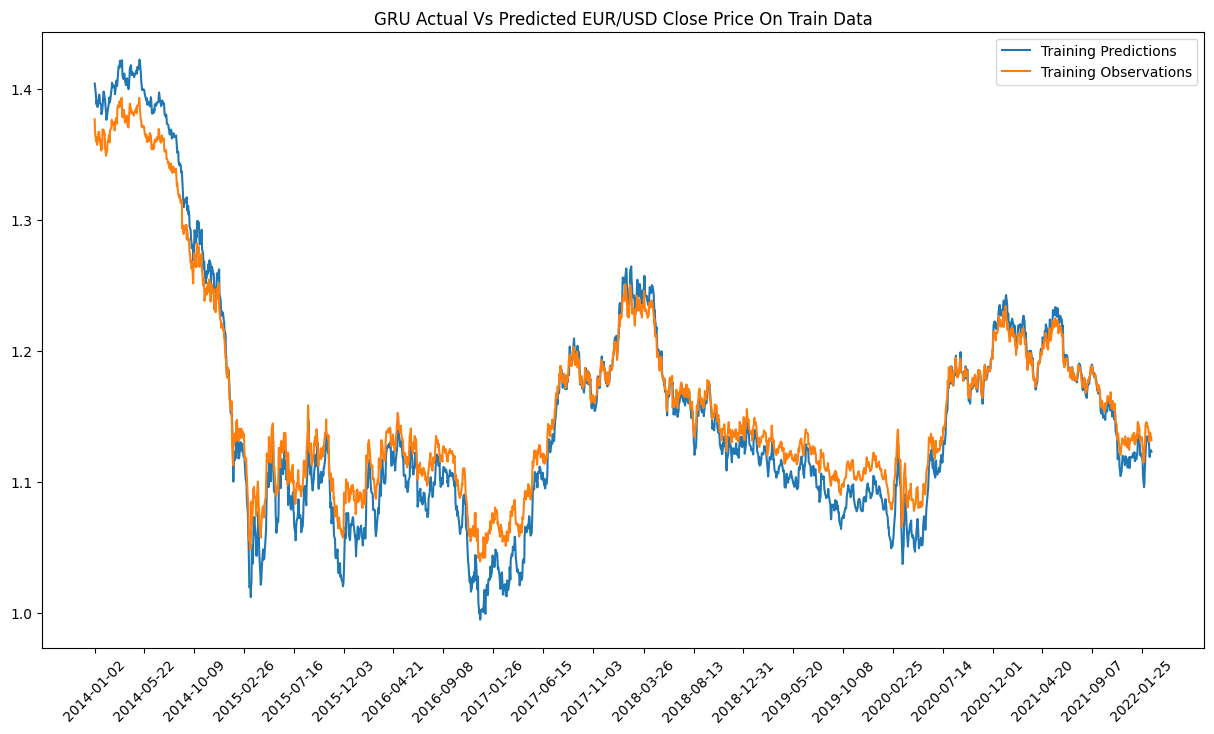

In [31]:
eur_usd_gru_train_predictions = gru.predict(eur_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted EUR/USD Close Price On Train Data')
plt.plot(eur_usd_date_train, eur_usd_gru_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.xticks(eur_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 3ms/step


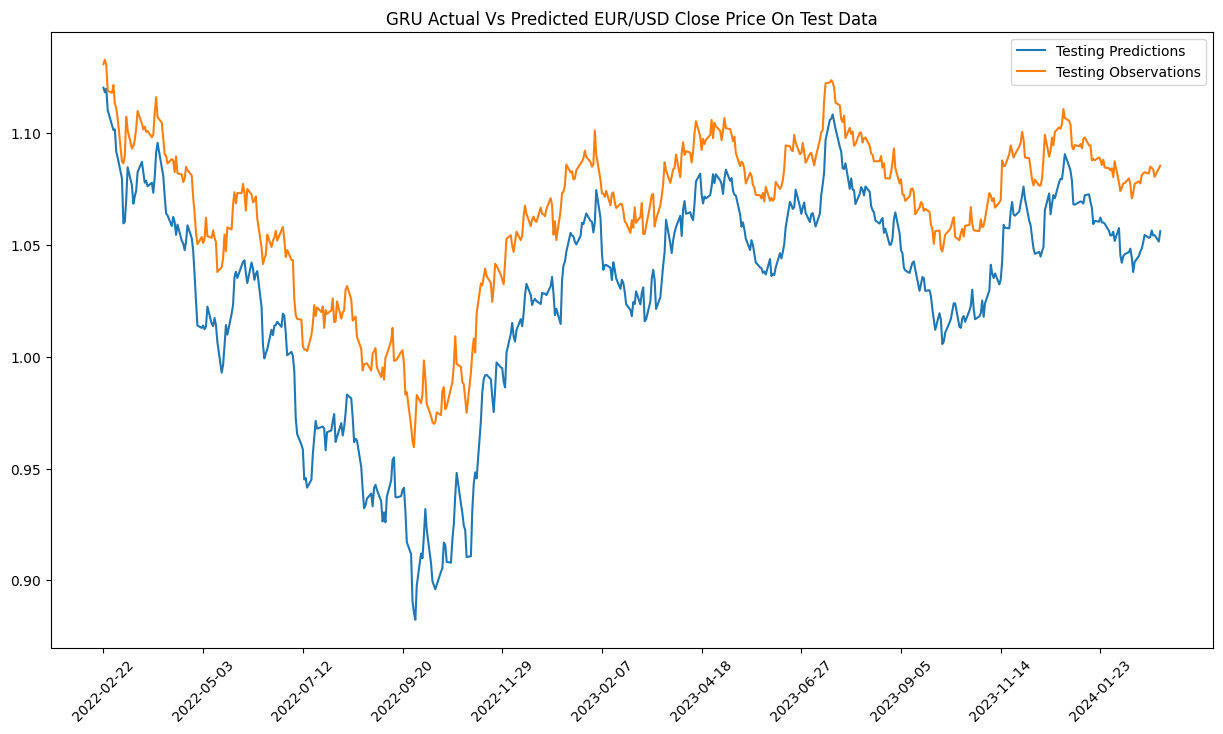

In [32]:
eur_usd_gru_test_predictions = gru.predict(eur_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted EUR/USD Close Price On Test Data')
plt.plot(eur_usd_date_test, eur_usd_gru_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

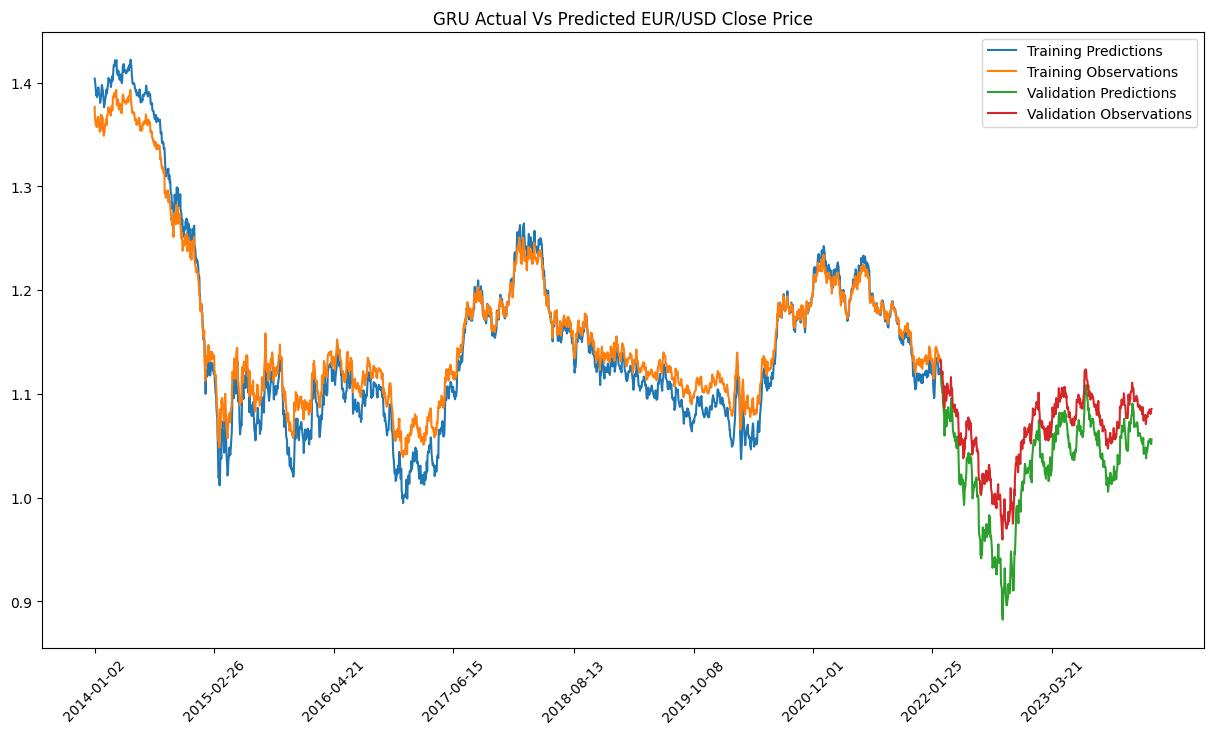

In [33]:
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted EUR/USD Close Price')
plt.plot(eur_usd_date_train, eur_usd_gru_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.plot(eur_usd_date_test, eur_usd_gru_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [34]:
gru.fit(gbp_usd_X_train, gbp_usd_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 2s 43ms/step - loss: 0.0299 - val_loss: 0.0029
Epoch 2/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0238 - val_loss: 9.3193e-04
Epoch 3/10
53/53 [==============================] - 1s 17ms/step - loss: 0.0203 - val_loss: 0.0018
Epoch 4/10
53/53 [==============================] - 1s 16ms/step - loss: 0.0207 - val_loss: 6.1049e-05
Epoch 5/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0198 - val_loss: 0.0016
Epoch 6/10
53/53 [==============================] - 1s 12ms/step - loss: 0.0181 - val_loss: 4.7939e-04
Epoch 7/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0193 - val_loss: 8.2837e-04
Epoch 8/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0180 - val_loss: 9.8111e-04
Epoch 9/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0148 - val_loss: 4.0613e-04
Epoch 10/10
53/53 [==============================] - 1s 14ms/step - loss: 0.0167 - va

67/67 [==============================] - 0s 4ms/step


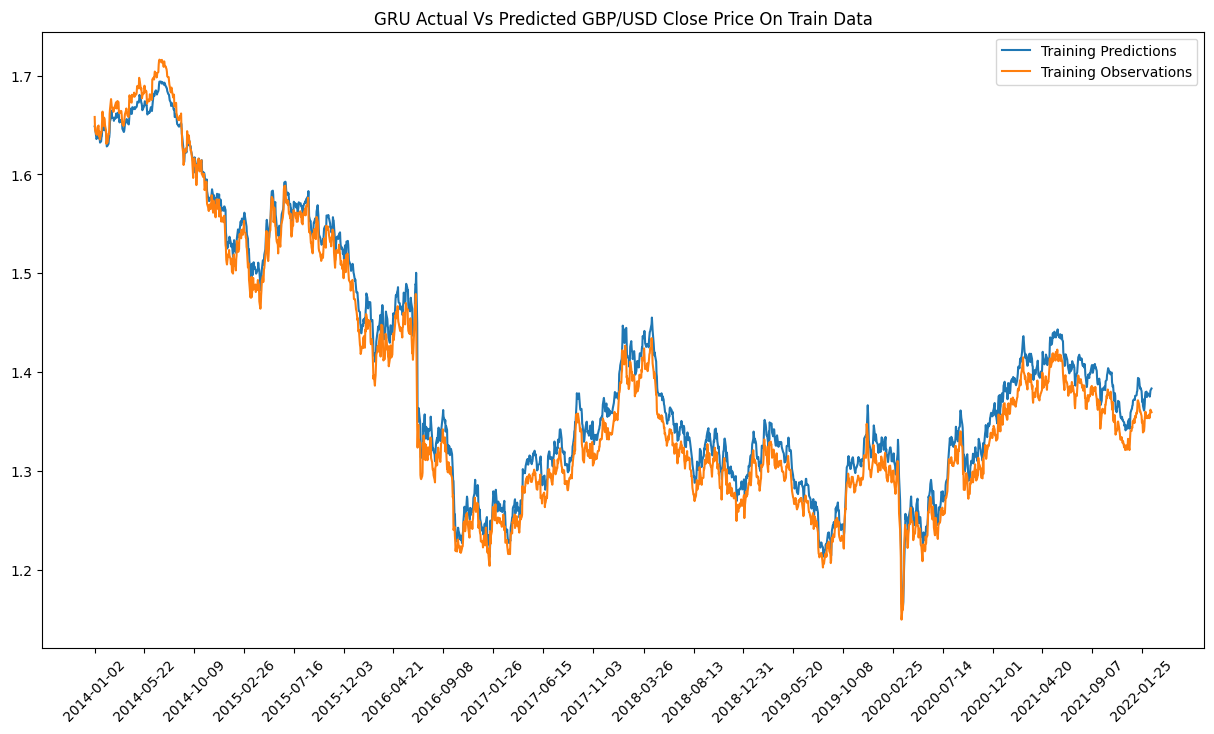

In [35]:
gbp_usd_gru_train_predictions = gru.predict(gbp_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted GBP/USD Close Price On Train Data')
plt.plot(gbp_usd_date_train, gbp_usd_gru_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.xticks(gbp_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 4ms/step


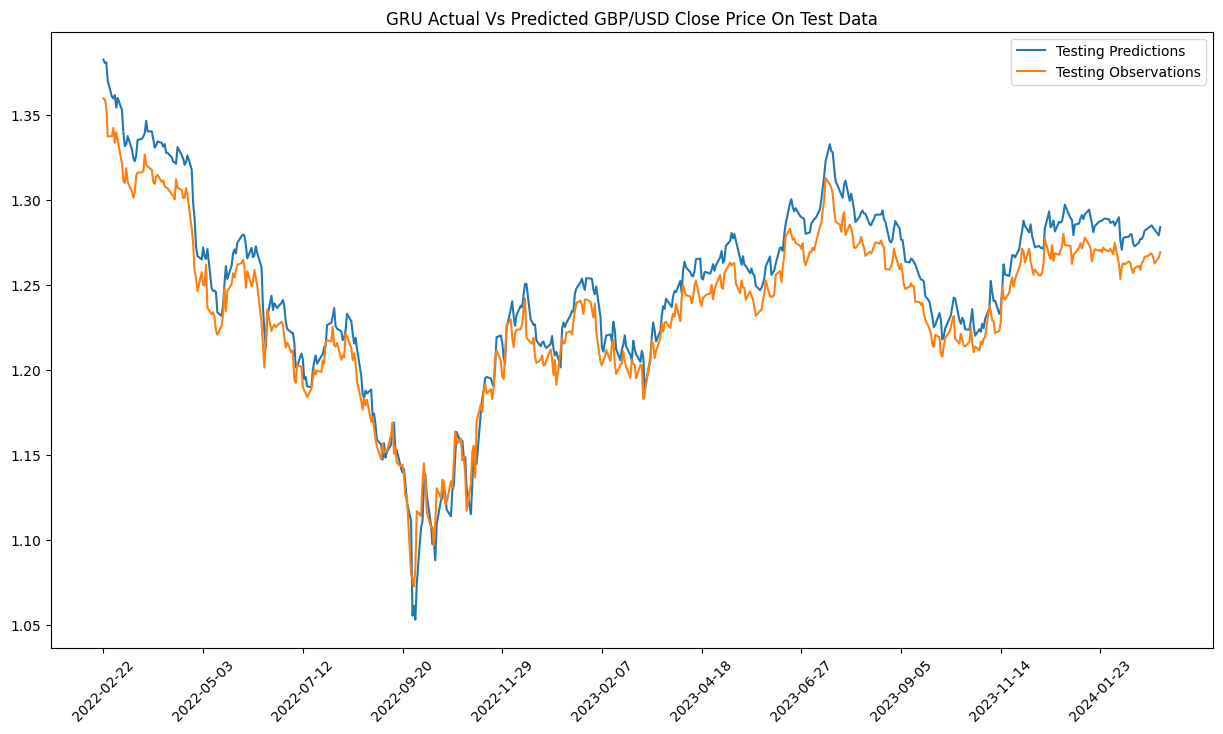

In [36]:
gbp_usd_gru_test_predictions = gru.predict(gbp_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted GBP/USD Close Price On Test Data')
plt.plot(gbp_usd_date_test, gbp_usd_gru_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

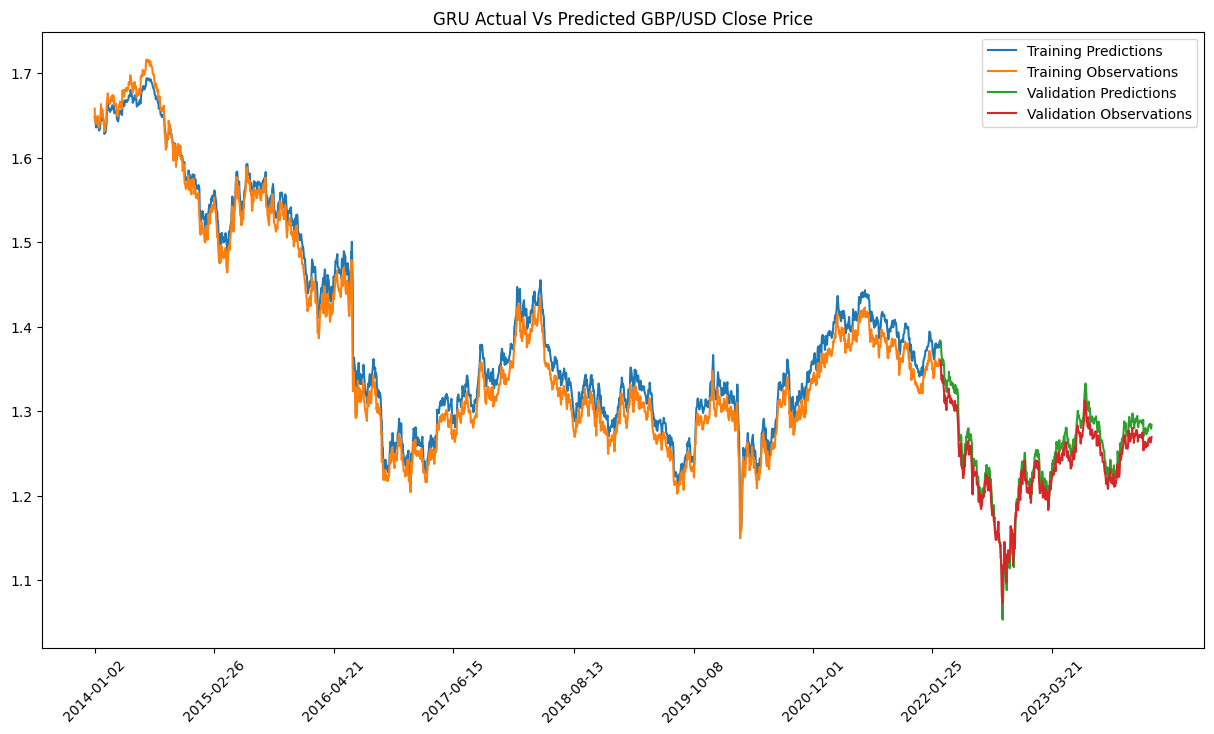

In [37]:
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted GBP/USD Close Price')
plt.plot(gbp_usd_date_train, gbp_usd_gru_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.plot(gbp_usd_date_test, gbp_usd_gru_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [38]:
gru.fit(usd_cad_X_train, usd_cad_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 1s 15ms/step - loss: 0.0179 - val_loss: 2.7612e-04
Epoch 2/10
53/53 [==============================] - 1s 12ms/step - loss: 0.0126 - val_loss: 1.4586e-04
Epoch 3/10
53/53 [==============================] - 1s 12ms/step - loss: 0.0119 - val_loss: 0.0011
Epoch 4/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0127 - val_loss: 2.8153e-04
Epoch 5/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0122 - val_loss: 4.8197e-04
Epoch 6/10
53/53 [==============================] - 1s 18ms/step - loss: 0.0120 - val_loss: 9.0207e-05
Epoch 7/10
53/53 [==============================] - 1s 18ms/step - loss: 0.0127 - val_loss: 1.8461e-04
Epoch 8/10
53/53 [==============================] - 1s 13ms/step - loss: 0.0121 - val_loss: 1.0385e-04
Epoch 9/10
53/53 [==============================] - 1s 14ms/step - loss: 0.0114 - val_loss: 1.0841e-04
Epoch 10/10
53/53 [==============================] - 1s 12ms/step - loss: 0.0

67/67 [==============================] - 0s 3ms/step


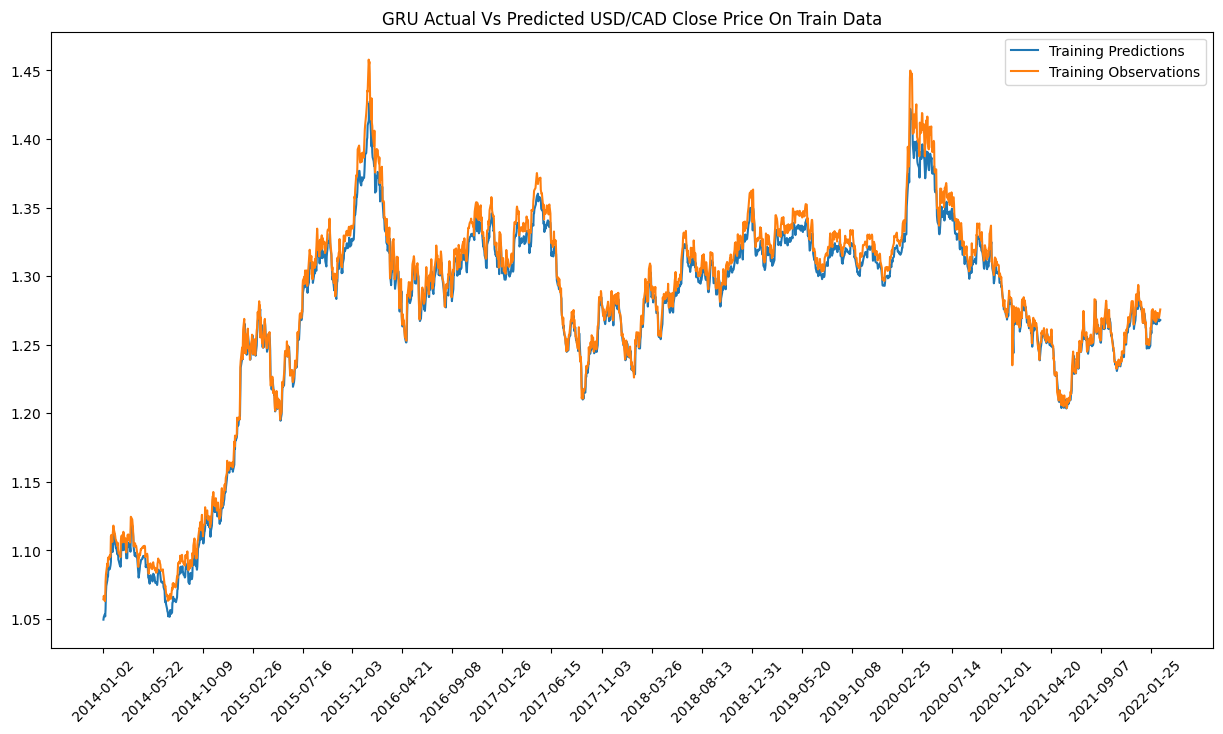

In [39]:
usd_cad_gru_train_predictions = gru.predict(usd_cad_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted USD/CAD Close Price On Train Data')
plt.plot(usd_cad_date_train, usd_cad_gru_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.xticks(usd_cad_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 3ms/step


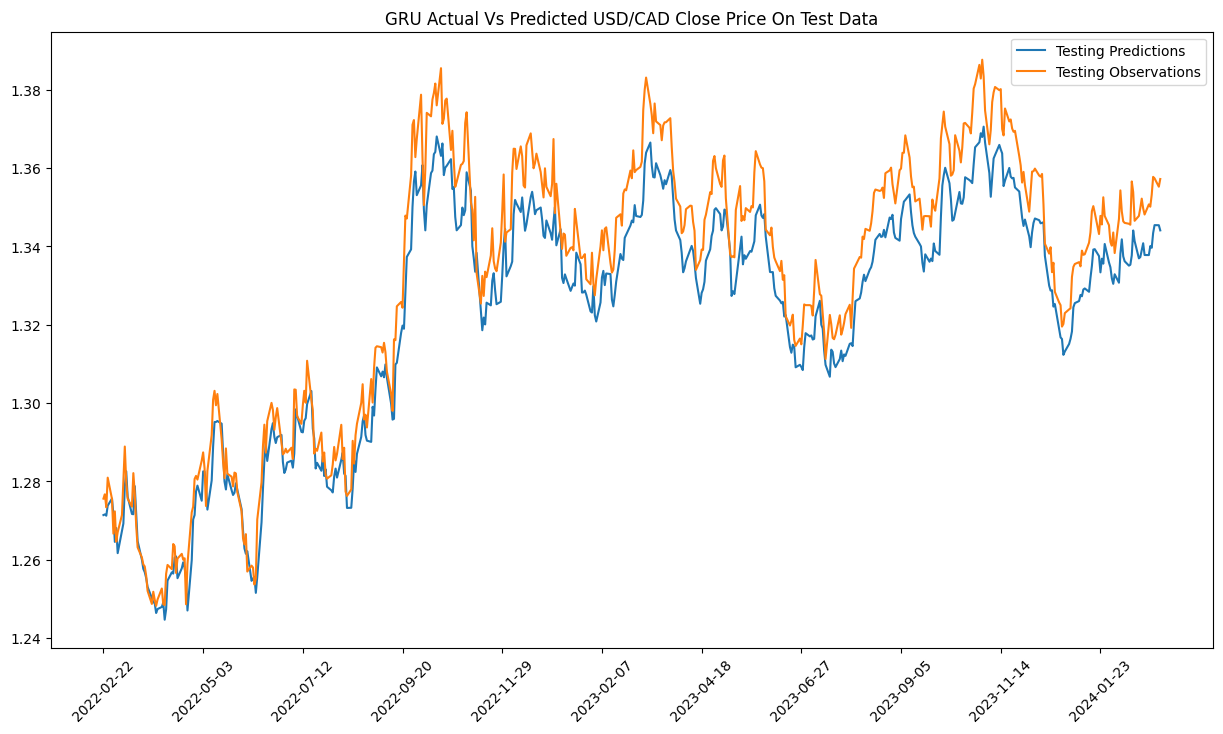

In [40]:
usd_cad_gru_test_predictions = gru.predict(usd_cad_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted USD/CAD Close Price On Test Data')
plt.plot(usd_cad_date_test, usd_cad_gru_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

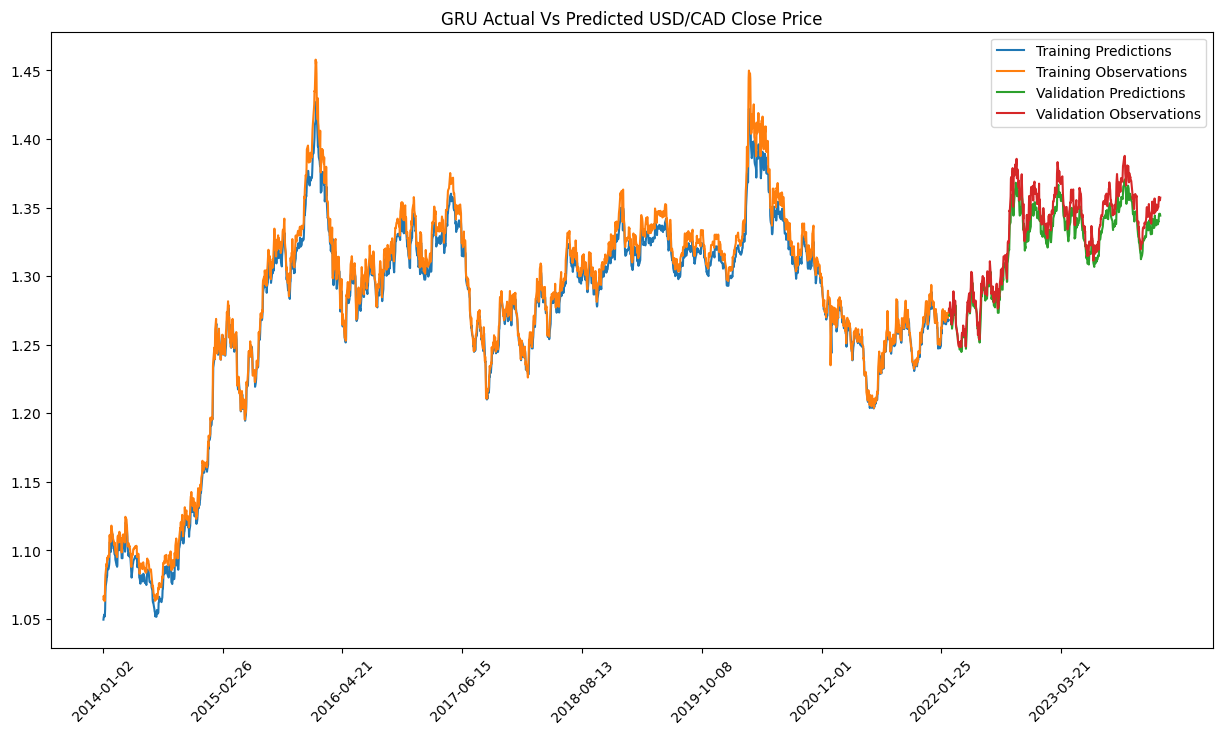

In [41]:
plt.figure(figsize=(15, 8))
plt.title('GRU Actual Vs Predicted USD/CAD Close Price')
plt.plot(usd_cad_date_train, usd_cad_gru_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.plot(usd_cad_date_test, usd_cad_gru_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

#Artificial Neural Network Model

In [42]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

ann.add(Dense(64, activation='relu', input_dim=eur_usd_X_train.shape[1]))

ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(1, activation='linear'))

ann.compile(optimizer='adam', loss='mean_squared_error')

ann.fit(eur_usd_X_train, eur_usd_y_train, epochs=10,
        batch_size=32, validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 1s 4ms/step - loss: 0.4154 - val_loss: 0.0080
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0954 - val_loss: 0.0059
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0677 - val_loss: 0.0043
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0445 - val_loss: 0.0018
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0315 - val_loss: 9.3933e-04
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0257 - val_loss: 2.4473e-05
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0271 - val_loss: 3.1693e-04
Epoch 8/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0266 - val_loss: 2.3436e-05
Epoch 9/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 8.5459e-04
Epoch 10/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 3.7224

67/67 [==============================] - 0s 830us/step


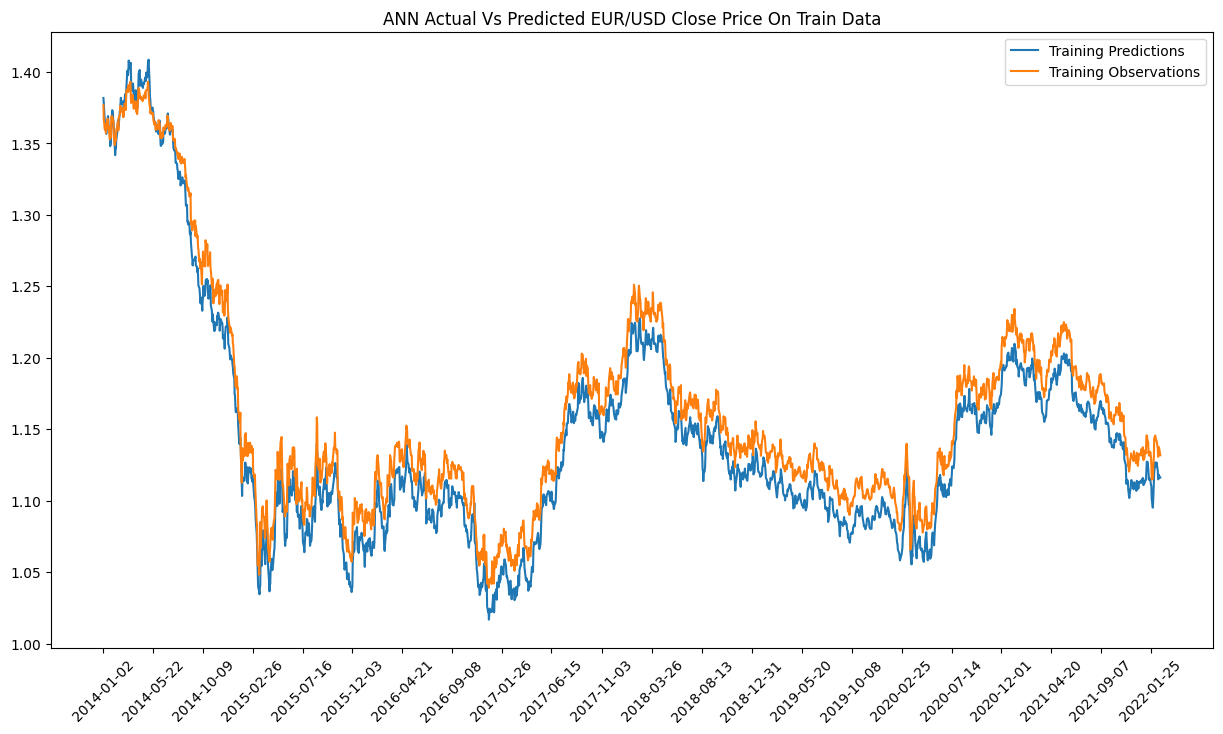

In [43]:
eur_usd_ann_train_predictions = ann.predict(eur_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted EUR/USD Close Price On Train Data')
plt.plot(eur_usd_date_train, eur_usd_ann_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.xticks(eur_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 943us/step


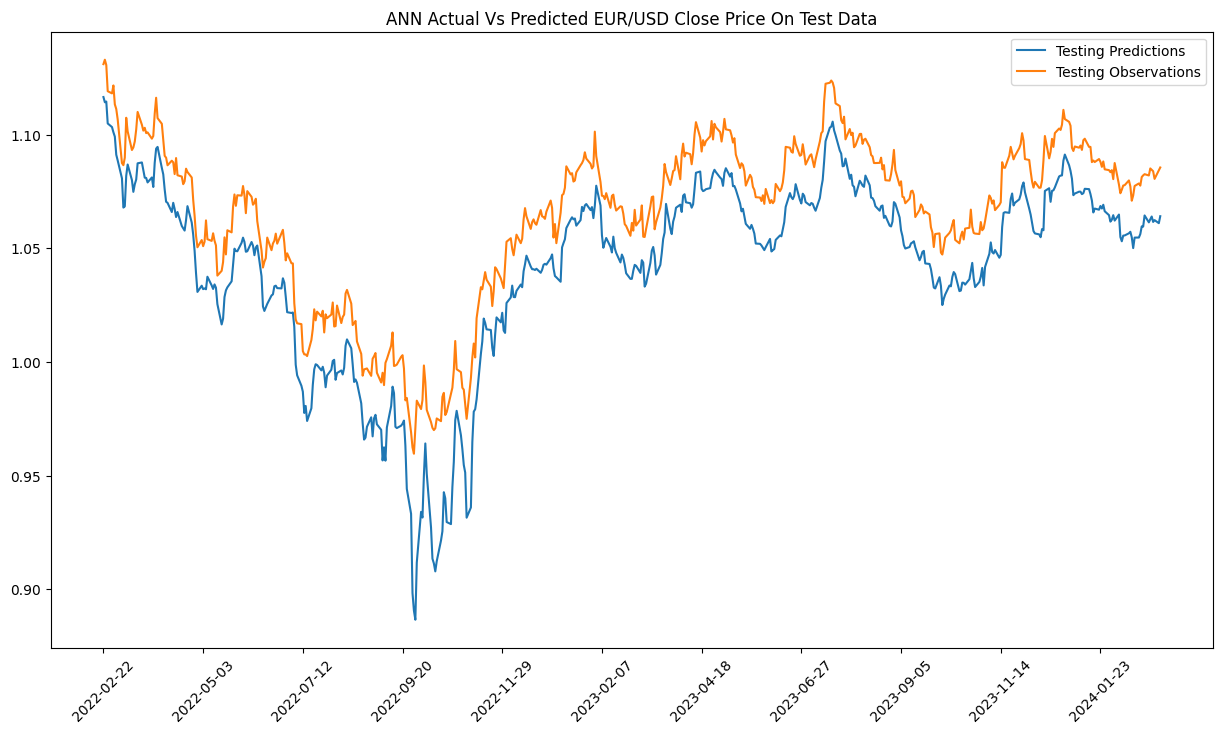

In [44]:
eur_usd_ann_test_predictions = ann.predict(eur_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted EUR/USD Close Price On Test Data')
plt.plot(eur_usd_date_test, eur_usd_ann_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

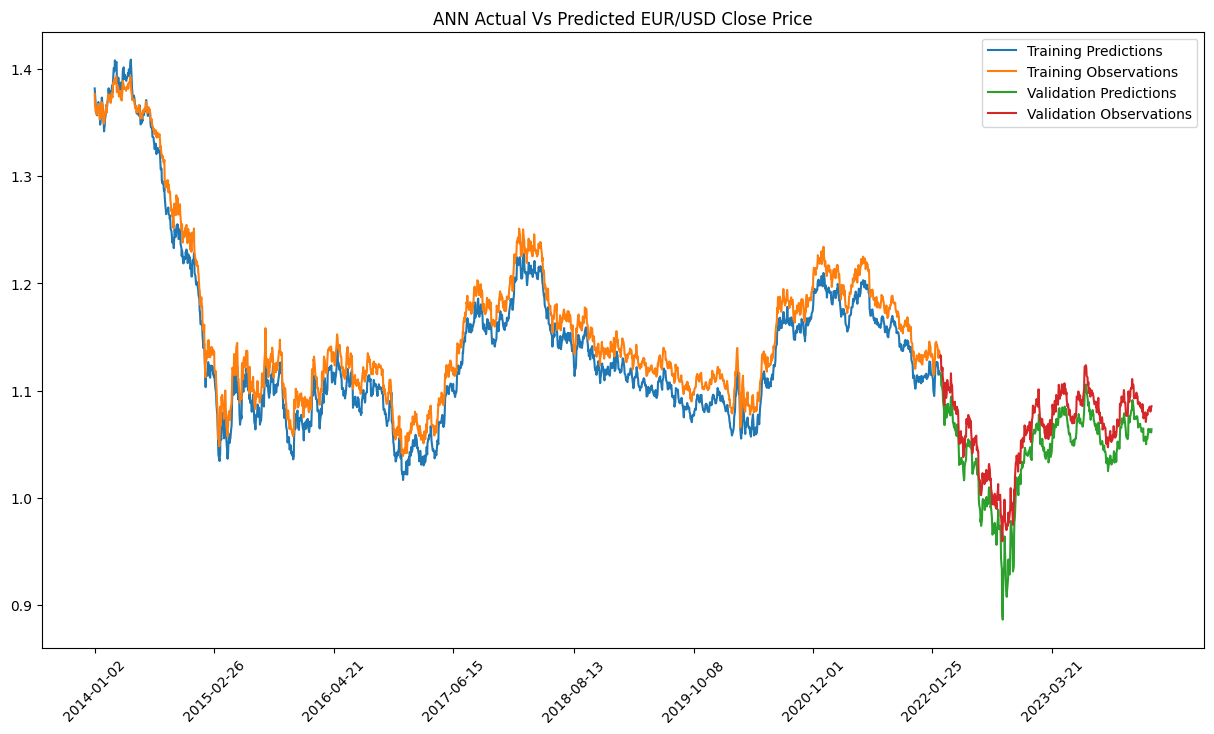

In [45]:
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted EUR/USD Close Price')
plt.plot(eur_usd_date_train, eur_usd_ann_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.plot(eur_usd_date_test, eur_usd_ann_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [46]:
ann.fit(gbp_usd_X_train, gbp_usd_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0380 - val_loss: 3.5353e-04
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.0011
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0312 - val_loss: 7.7736e-04
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0311 - val_loss: 6.0936e-04
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 2.5776e-05
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0292 - val_loss: 4.0947e-04
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0309 - val_loss: 7.7741e-05
Epoch 8/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0294 - val_loss: 3.8935e-05
Epoch 9/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0291 - val_loss: 8.8909e-04
Epoch 10/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0264 - val_

67/67 [==============================] - 0s 888us/step


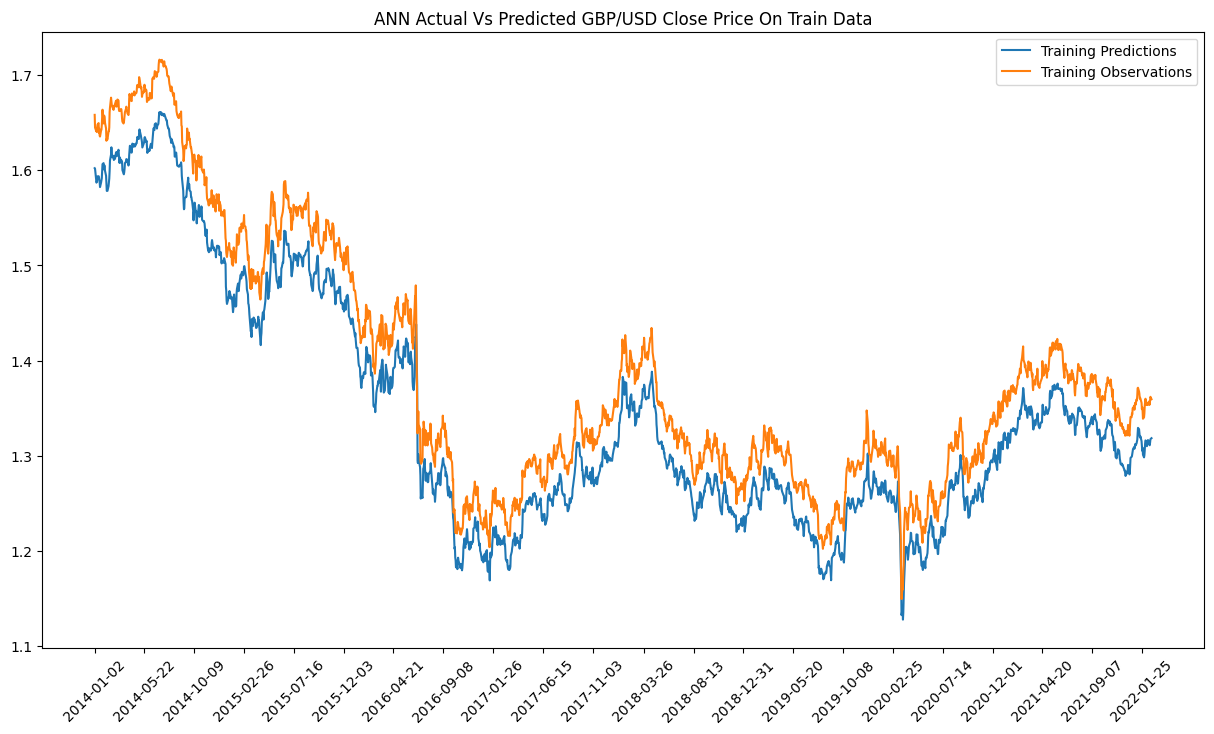

In [47]:
gbp_usd_ann_train_predictions = ann.predict(gbp_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted GBP/USD Close Price On Train Data')
plt.plot(gbp_usd_date_train, gbp_usd_ann_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.xticks(gbp_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 1ms/step


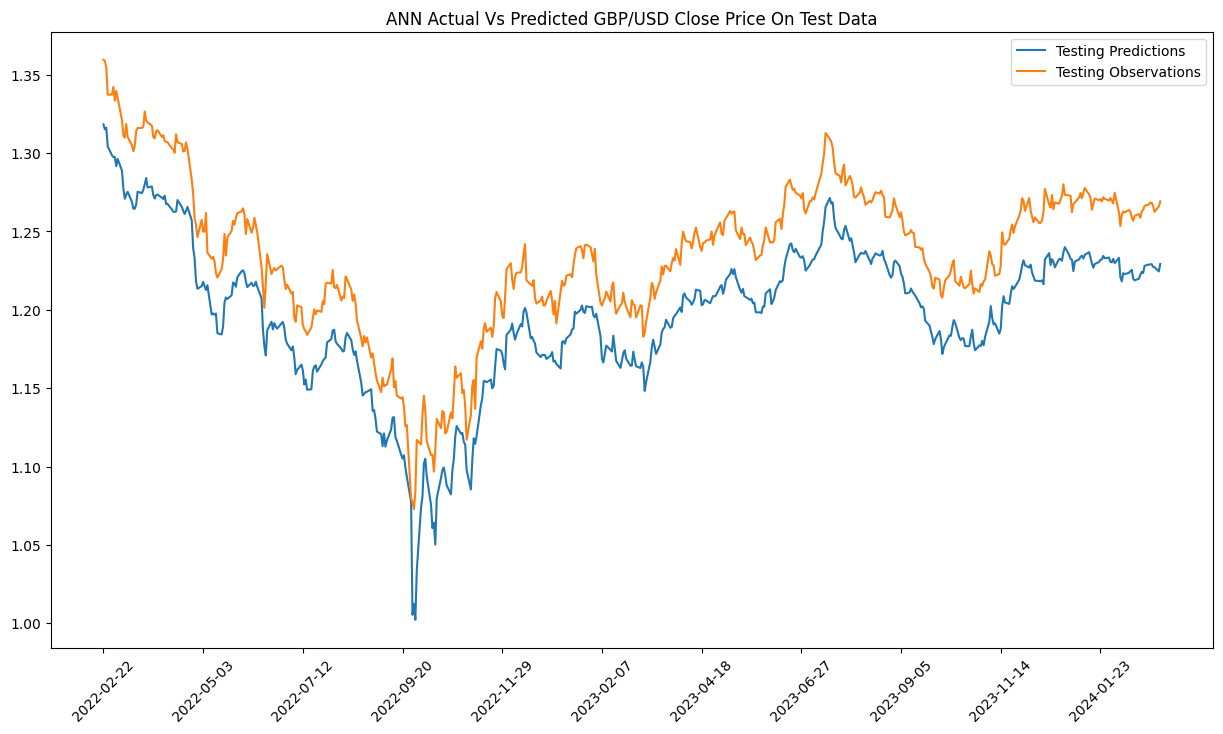

In [48]:
gbp_usd_ann_test_predictions = ann.predict(gbp_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted GBP/USD Close Price On Test Data')
plt.plot(gbp_usd_date_test, gbp_usd_ann_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

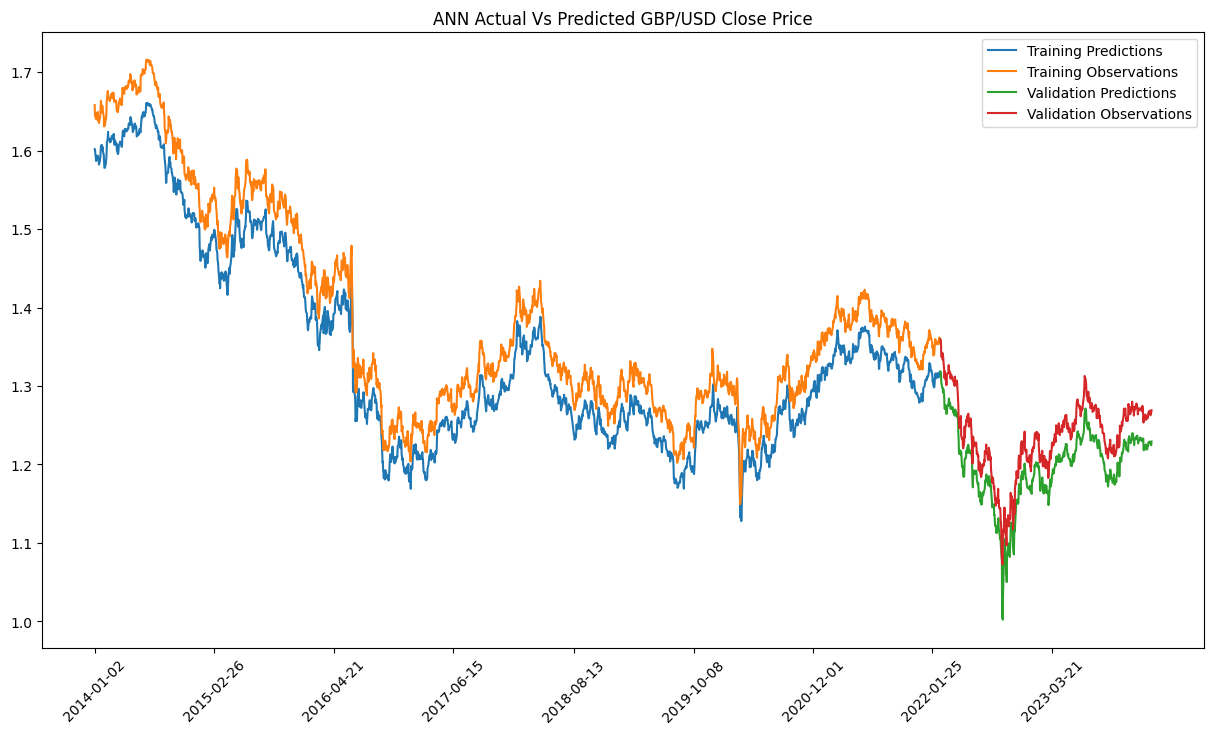

In [49]:
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted GBP/USD Close Price')
plt.plot(gbp_usd_date_train, gbp_usd_ann_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.plot(gbp_usd_date_test, gbp_usd_ann_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [50]:
ann.fit(usd_cad_X_train, usd_cad_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0235 - val_loss: 0.0027
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0221 - val_loss: 3.4283e-05
Epoch 3/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 1.7634e-04
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0016
Epoch 5/10
53/53 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 8.2555e-04
Epoch 6/10
53/53 [==============================] - 1s 11ms/step - loss: 0.0193 - val_loss: 4.7432e-05
Epoch 7/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 1.0800e-04
Epoch 8/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 3.8137e-05
Epoch 9/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0178 - val_loss: 1.9784e-05
Epoch 10/10
53/53 [==============================] - 0s 4ms/step - loss: 0.0180 - val_los

67/67 [==============================] - 0s 1ms/step


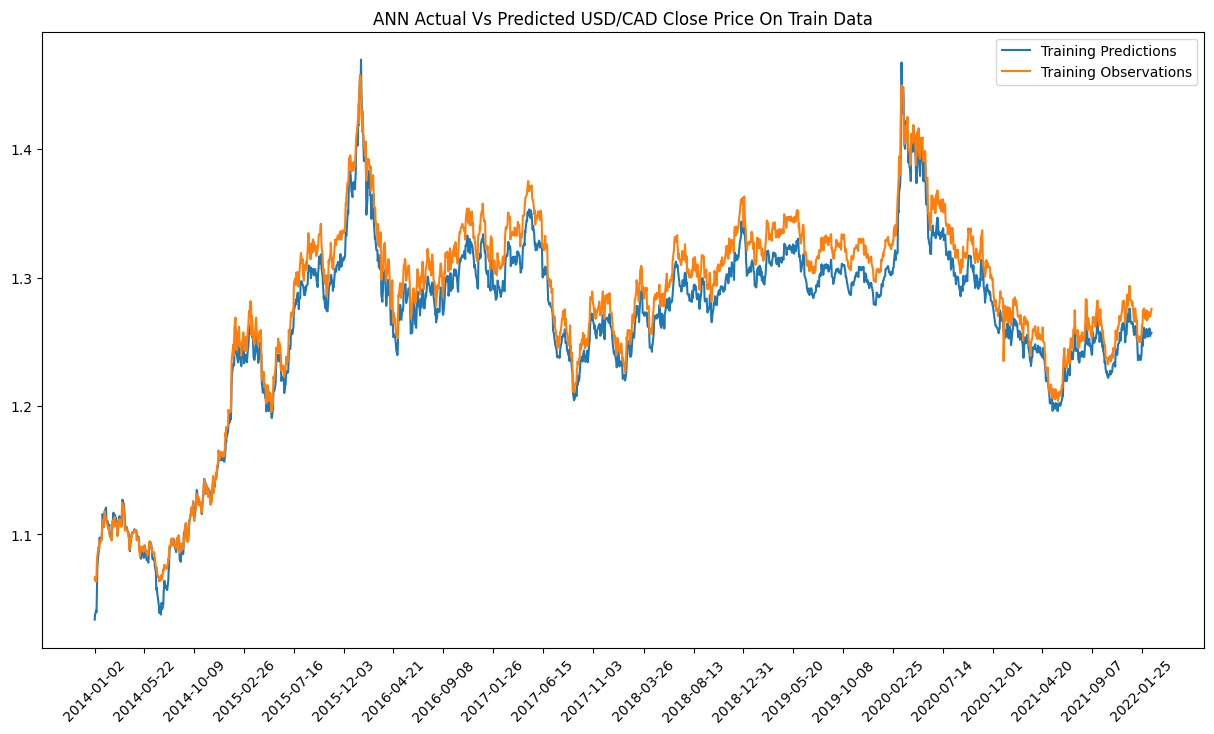

In [51]:
usd_cad_ann_train_predictions = ann.predict(usd_cad_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted USD/CAD Close Price On Train Data')
plt.plot(usd_cad_date_train, usd_cad_ann_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.xticks(usd_cad_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 1ms/step


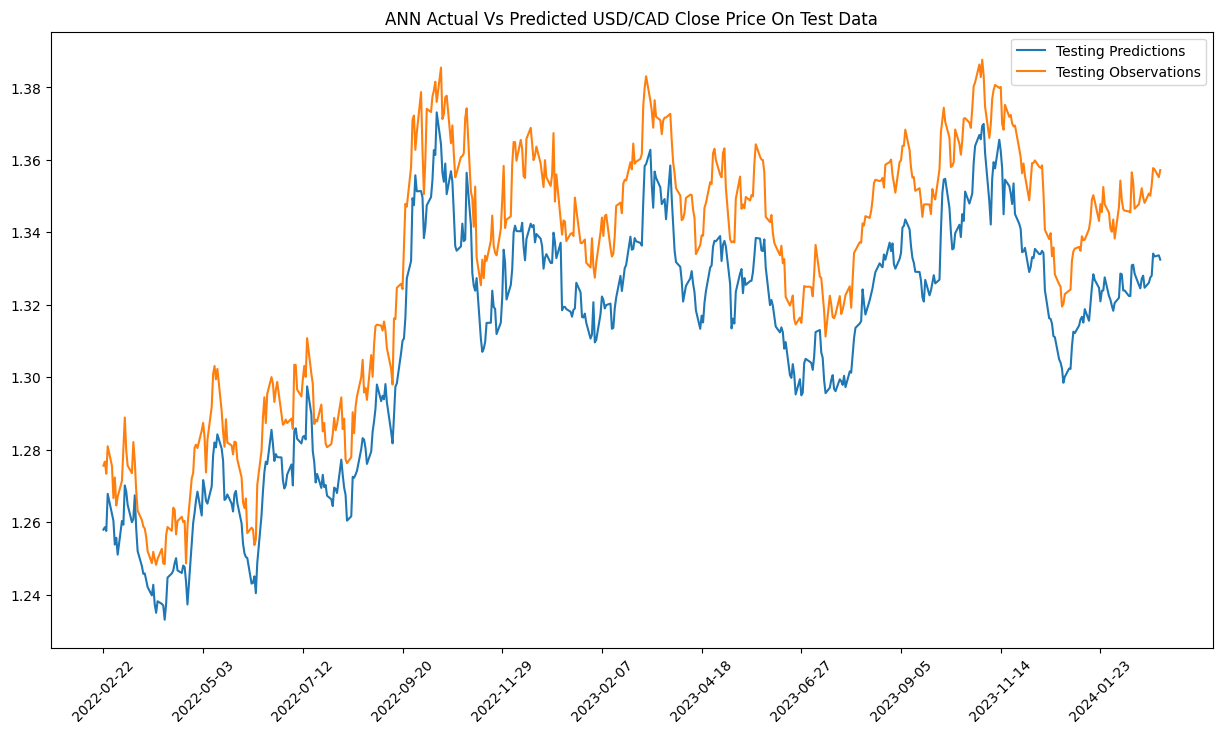

In [52]:
usd_cad_ann_test_predictions = ann.predict(usd_cad_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted USD/CAD Close Price On Test Data')
plt.plot(usd_cad_date_test, usd_cad_ann_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

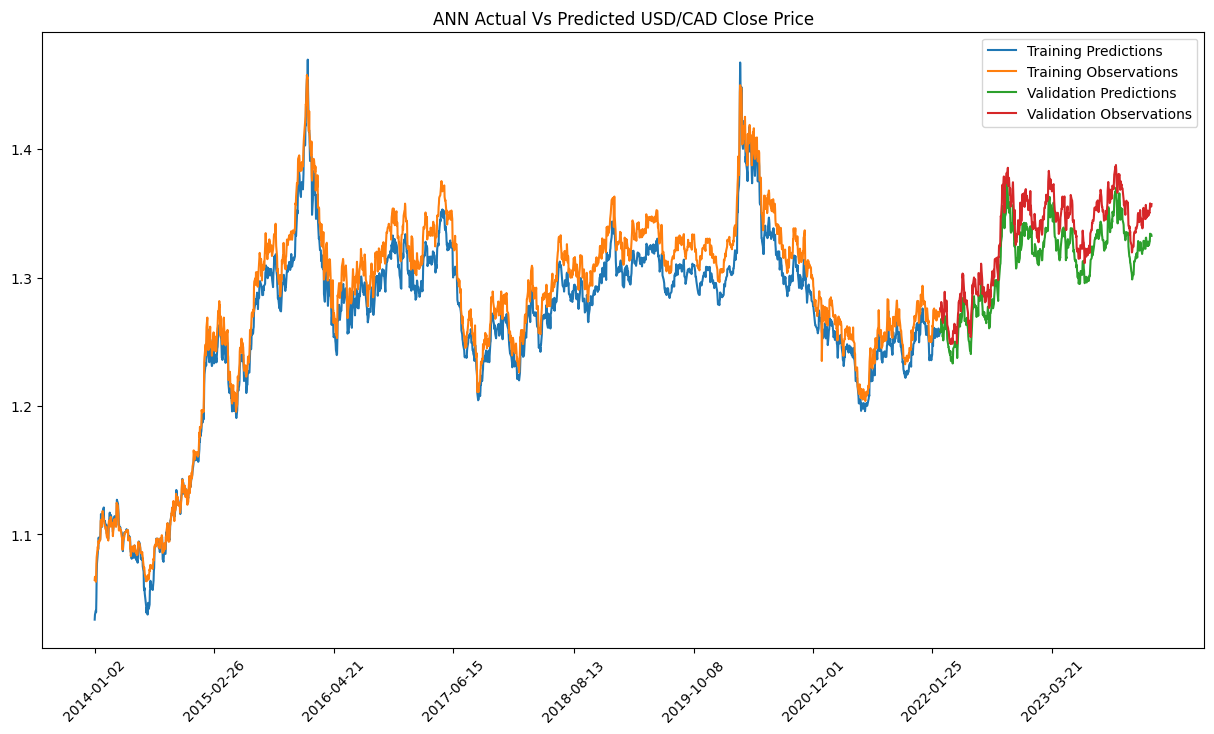

In [53]:
plt.figure(figsize=(15, 8))
plt.title('ANN Actual Vs Predicted USD/CAD Close Price')
plt.plot(usd_cad_date_train, usd_cad_ann_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.plot(usd_cad_date_test, usd_cad_ann_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

#Multi-layer Perceptron Model





In [54]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

mlp = Sequential()

mlp.add(Dense(100, activation="relu", input_dim=eur_usd_X_train.shape[1]))
mlp.add(Dense(1, activation="relu"))

mlp.compile(loss='mse', optimizer="adam")

mlp.fit(eur_usd_X_train, eur_usd_y_train, epochs=10)

Epoch 1/10
67/67 [==============================] - 0s 1ms/step - loss: 0.2458
Epoch 2/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0477
Epoch 3/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0296
Epoch 4/10
67/67 [==============================] - 0s 999us/step - loss: 0.0153
Epoch 5/10
67/67 [==============================] - 0s 972us/step - loss: 0.0061
Epoch 6/10
67/67 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 7/10
67/67 [==============================] - 0s 1ms/step - loss: 4.0260e-04
Epoch 8/10
67/67 [==============================] - 0s 1ms/step - loss: 7.7431e-05
Epoch 9/10
67/67 [==============================] - 0s 1ms/step - loss: 2.2367e-05
Epoch 10/10
67/67 [==============================] - 0s 1ms/step - loss: 1.5433e-05


67/67 [==============================] - 0s 826us/step


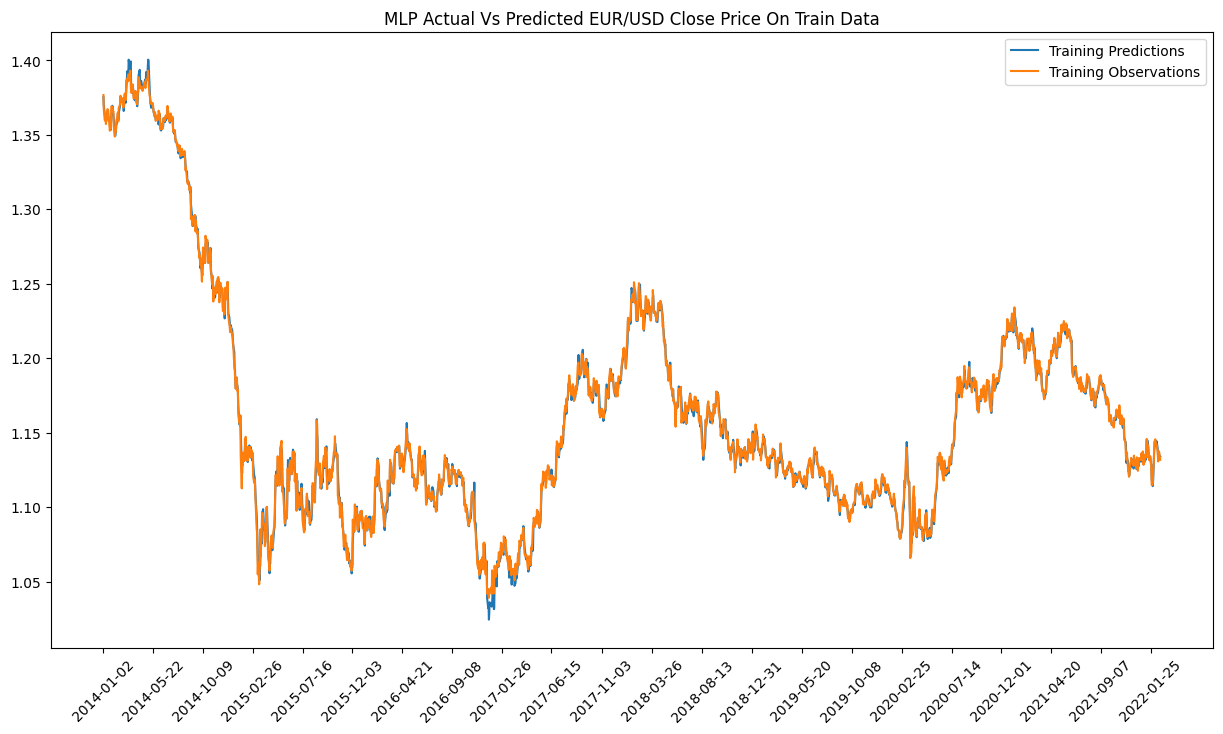

In [55]:
eur_usd_mlp_train_predictions = mlp.predict(eur_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted EUR/USD Close Price On Train Data')
plt.plot(eur_usd_date_train, eur_usd_mlp_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.xticks(eur_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 995us/step


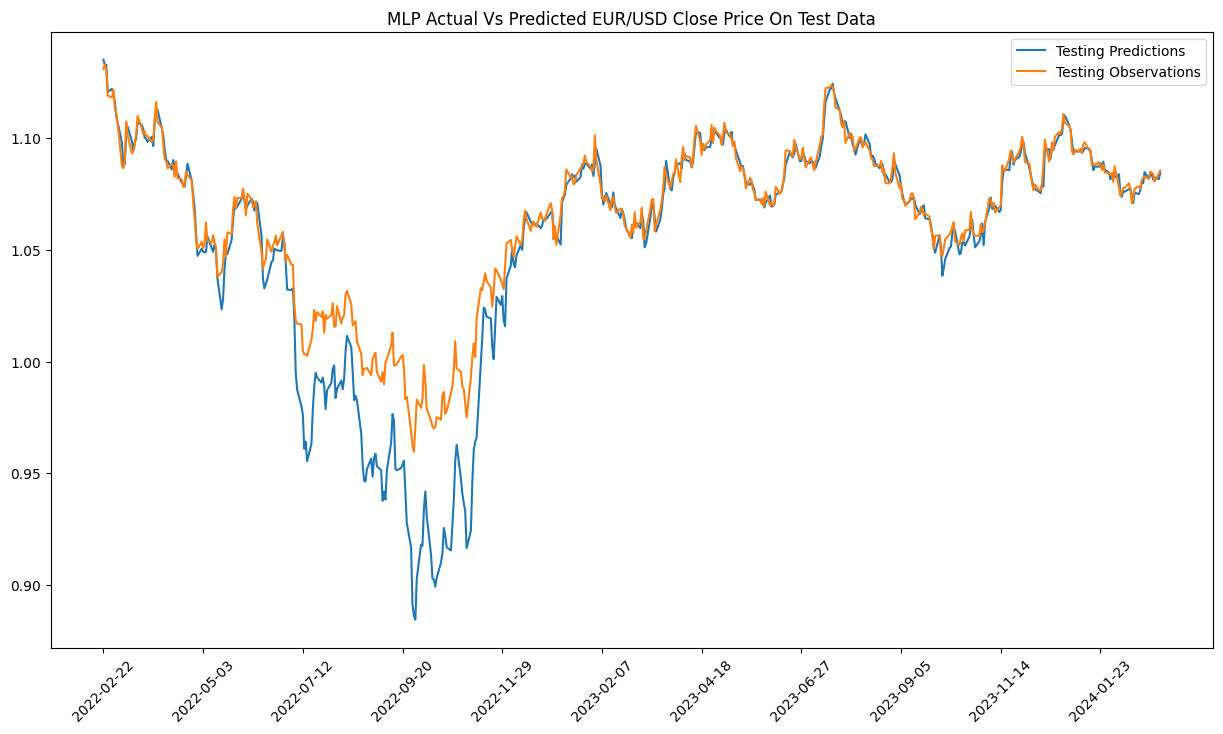

In [56]:
eur_usd_mlp_test_predictions = mlp.predict(eur_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted EUR/USD Close Price On Test Data')
plt.plot(eur_usd_date_test, eur_usd_mlp_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

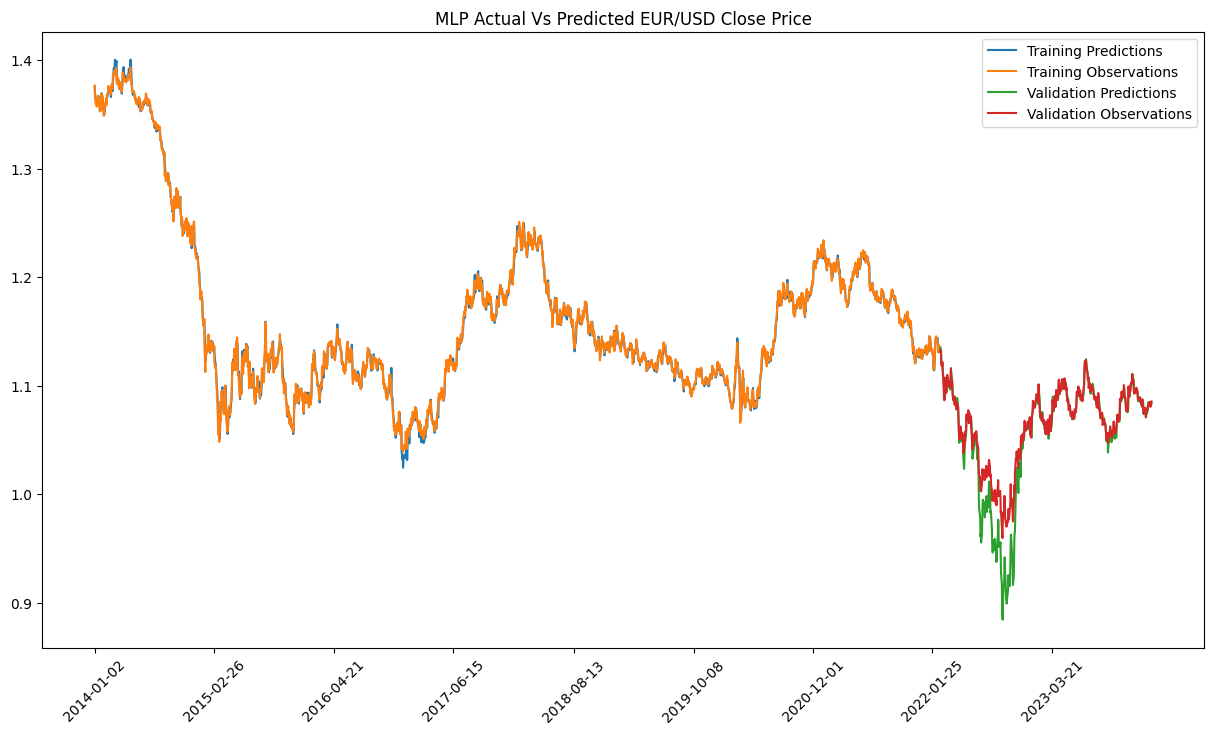

In [57]:
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted EUR/USD Close Price')
plt.plot(eur_usd_date_train, eur_usd_mlp_train_predictions)
plt.plot(eur_usd_date_train, eur_usd_y_train)
plt.plot(eur_usd_date_test, eur_usd_mlp_test_predictions)
plt.plot(eur_usd_date_test, eur_usd_y_test)
plt.xticks(eur_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [58]:
mlp.fit(gbp_usd_X_train, gbp_usd_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 2.0613e-04
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 8.3198e-05 - val_loss: 1.7506e-05
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 3.8119e-05 - val_loss: 1.7886e-05
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 3.6952e-05 - val_loss: 1.6808e-05
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 3.6582e-05 - val_loss: 1.7512e-05
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 3.5988e-05 - val_loss: 1.7678e-05
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 3.6001e-05 - val_loss: 1.8250e-05
Epoch 8/10
53/53 [==============================] - 0s 2ms/step - loss: 3.5616e-05 - val_loss: 1.7180e-05
Epoch 9/10
53/53 [==============================] - 0s 2ms/step - loss: 3.4930e-05 - val_loss: 1.6840e-05
Epoch 10/10
53/53 [==============================]

67/67 [==============================] - 0s 833us/step


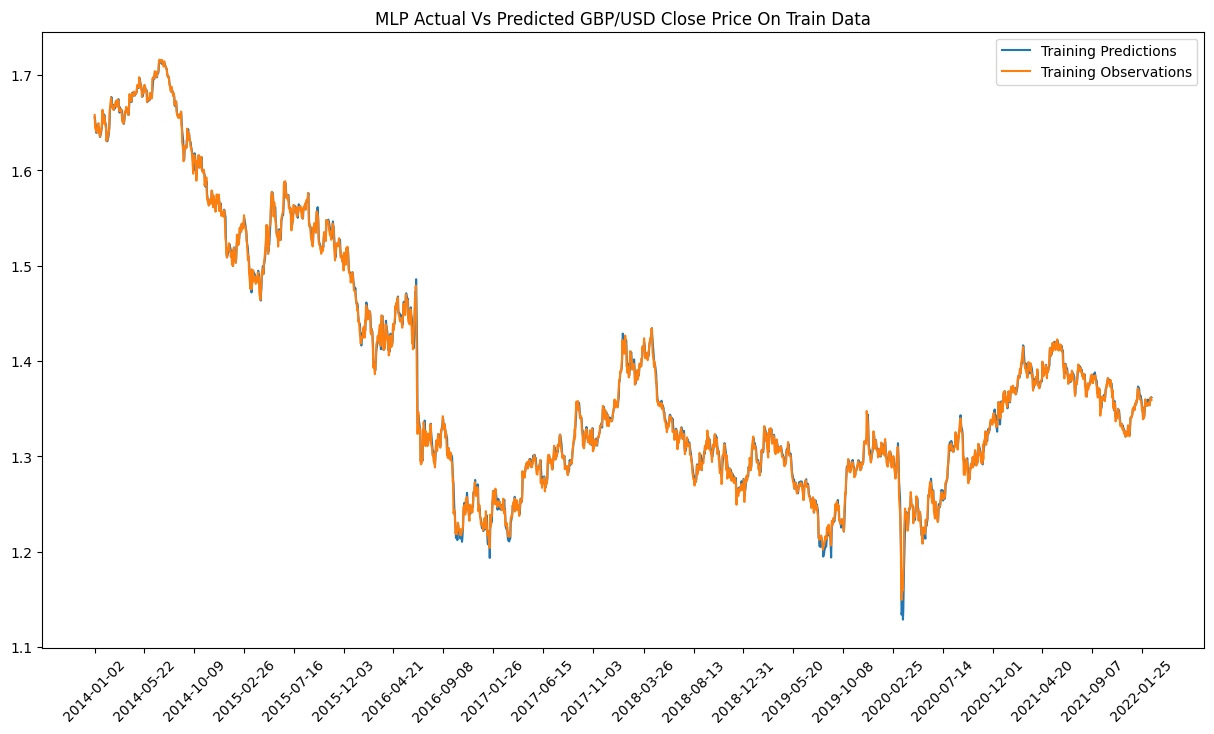

In [59]:
gbp_usd_mlp_train_predictions = mlp.predict(gbp_usd_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted GBP/USD Close Price On Train Data')
plt.plot(gbp_usd_date_train, gbp_usd_mlp_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.xticks(gbp_usd_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 954us/step


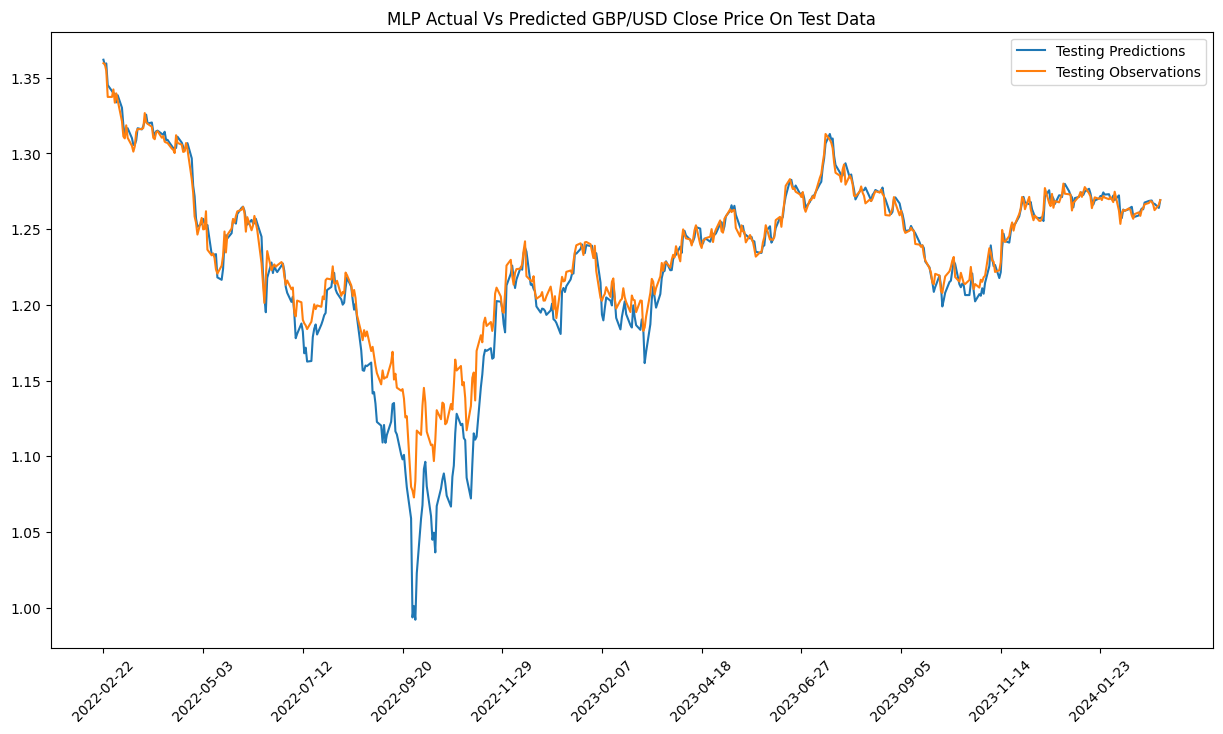

In [60]:
gbp_usd_mlp_test_predictions = mlp.predict(gbp_usd_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted GBP/USD Close Price On Test Data')
plt.plot(gbp_usd_date_test, gbp_usd_mlp_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

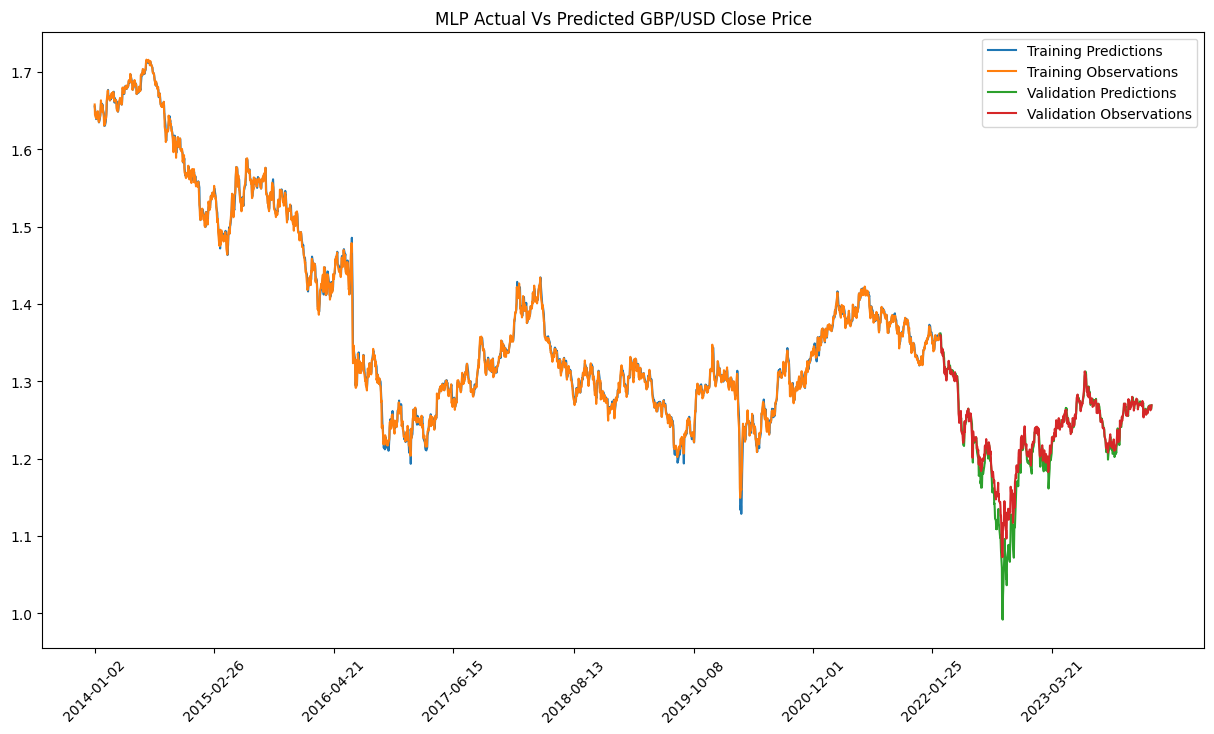

In [61]:
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted GBP/USD Close Price')
plt.plot(gbp_usd_date_train, gbp_usd_mlp_train_predictions)
plt.plot(gbp_usd_date_train, gbp_usd_y_train)
plt.plot(gbp_usd_date_test, gbp_usd_mlp_test_predictions)
plt.plot(gbp_usd_date_test, gbp_usd_y_test)
plt.xticks(gbp_usd_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [62]:
mlp.fit(usd_cad_X_train, usd_cad_y_train, epochs=10, batch_size=32,
        validation_split=0.2)

Epoch 1/10
53/53 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 6.6398e-05
Epoch 2/10
53/53 [==============================] - 0s 2ms/step - loss: 5.4715e-05 - val_loss: 3.5820e-05
Epoch 3/10
53/53 [==============================] - 0s 2ms/step - loss: 2.5180e-05 - val_loss: 2.0359e-05
Epoch 4/10
53/53 [==============================] - 0s 2ms/step - loss: 1.9893e-05 - val_loss: 1.7157e-05
Epoch 5/10
53/53 [==============================] - 0s 2ms/step - loss: 1.9470e-05 - val_loss: 1.5691e-05
Epoch 6/10
53/53 [==============================] - 0s 2ms/step - loss: 1.8557e-05 - val_loss: 1.7144e-05
Epoch 7/10
53/53 [==============================] - 0s 2ms/step - loss: 1.8446e-05 - val_loss: 1.5288e-05
Epoch 8/10
53/53 [==============================] - 0s 2ms/step - loss: 1.8180e-05 - val_loss: 1.5410e-05
Epoch 9/10
53/53 [==============================] - 0s 2ms/step - loss: 1.8529e-05 - val_loss: 1.5475e-05
Epoch 10/10
53/53 [==============================]

67/67 [==============================] - 0s 824us/step


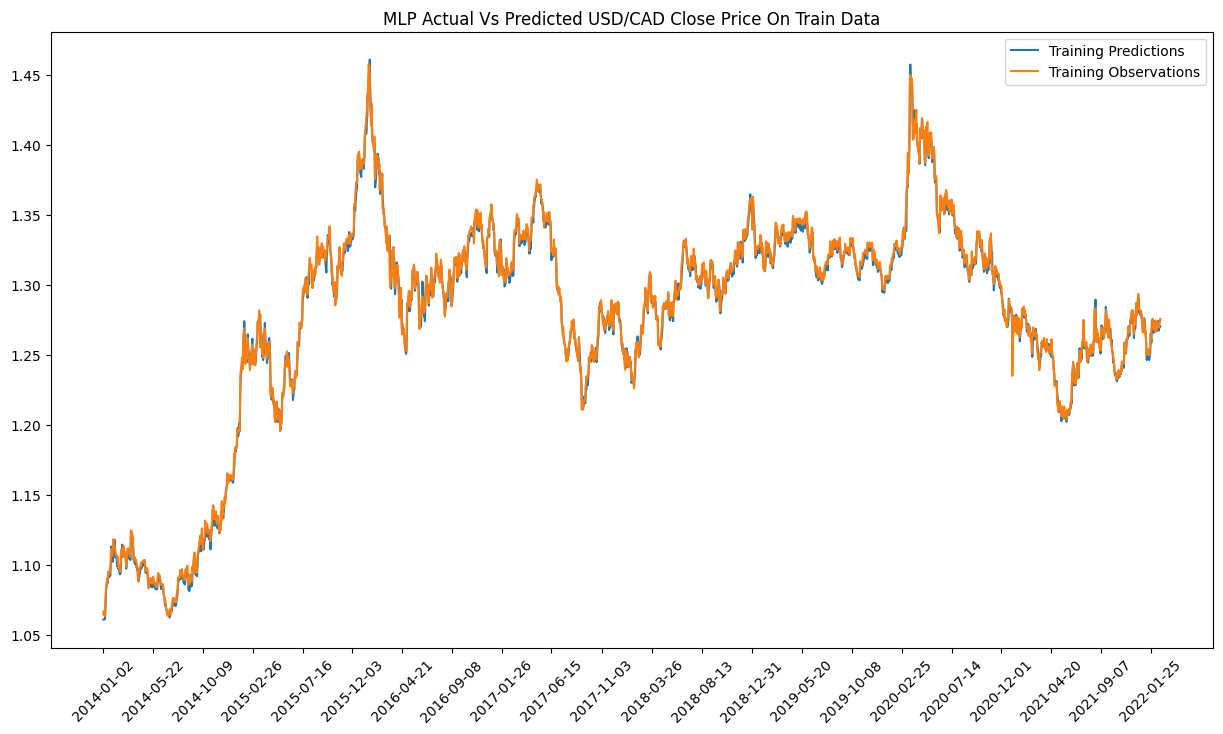

In [63]:
usd_cad_mlp_train_predictions = mlp.predict(usd_cad_X_train).flatten()
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted USD/CAD Close Price On Train Data')
plt.plot(usd_cad_date_train, usd_cad_mlp_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.xticks(usd_cad_date_train[::100], rotation=45)
plt.legend(['Training Predictions', 'Training Observations'])

17/17 [==============================] - 0s 1ms/step


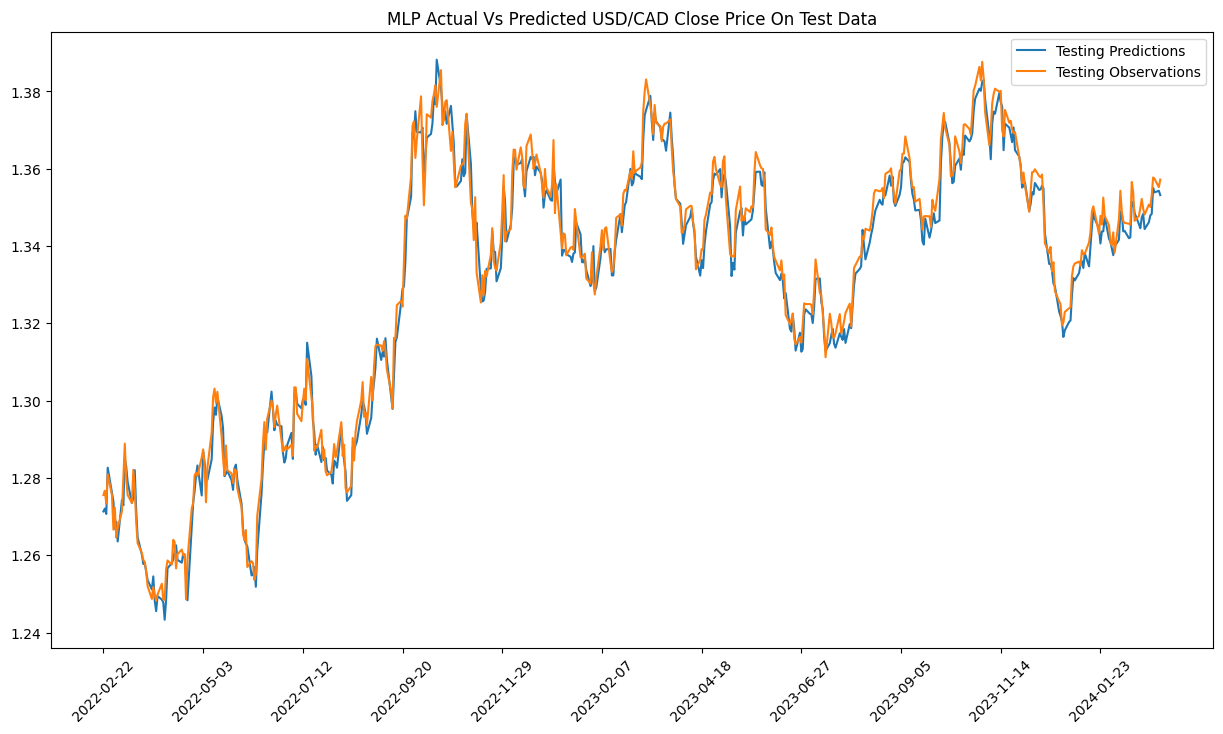

In [64]:
usd_cad_mlp_test_predictions = mlp.predict(usd_cad_X_test).flatten()
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted USD/CAD Close Price On Test Data')
plt.plot(usd_cad_date_test, usd_cad_mlp_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date_test[::50], rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])

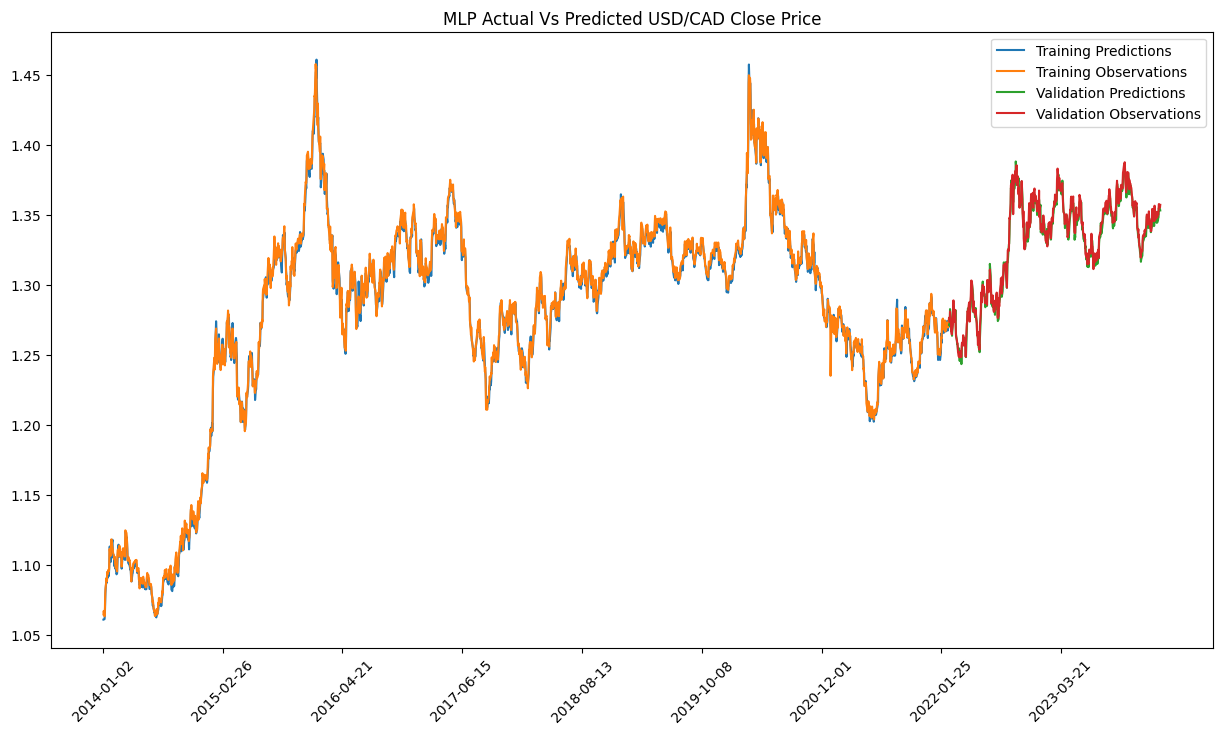

In [65]:
plt.figure(figsize=(15, 8))
plt.title('MLP Actual Vs Predicted USD/CAD Close Price')
plt.plot(usd_cad_date_train, usd_cad_mlp_train_predictions)
plt.plot(usd_cad_date_train, usd_cad_y_train)
plt.plot(usd_cad_date_test, usd_cad_mlp_test_predictions)
plt.plot(usd_cad_date_test, usd_cad_y_test)
plt.xticks(usd_cad_date[::300], rotation=45)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])